# Worksheet 7: Confidence Intervals Based on the Central Limit Theorem



#### Lecture and Tutorial Learning Goals:
From this section, students are expected to be able to:

1. Describe the Law of Large Numbers.
2. Describe a normal distribution.
3. Explain the Central Limit Theorem and other general asymptotic results (such as for quantiles), and their role in constructing confidence intervals.
4. Write a computer script to calculate confidence intervals based on the assumption of normality or the Central Limit Theorem.
5. Discuss the potential limitations of these methods.
6. Decide whether to use asymptotic theory or bootstrapping to compute estimator uncertainty.

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
penguins <- read.csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
source("tests_worksheet_07.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

 

## 1. Short Recap & Warm-Up

Before we start exploring the new material for this week, let's remind ourselves of some of the most important points that we covered in the previous week by answering a couple of questions.

**Question 1.1**
<br>{points: 1}

About hypothesis tests, which of the alternative below is correct?

A. In a hypothesis test, there are two or more hypotheses that are tested against each other. 

B. In a hypothesis test, we reject $H_0$ when the probability that $H_0$ is true is lower than the probability that $H_1$ is true.

C. In a hypothesis test, the lower the p-value is, the higher is the probability that $H_0$ is false. 

D. All the above alternatives are correct.

E. None of the above alternatives are correct. 


_Assign your answer to an object called `answer1.1`. Your answer should be a single character surrounded by quotes._

In [2]:
# answer1.1 <- ...

### BEGIN SOLUTION
answer1.1 <- "E"
### END SOLUTION

In [3]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

John and Marie decided to test $H_0: \mu=0$ vs $H_1: \mu\neq 0$. They used the same data and obtained the same test statistic. John did not reject $H_0$, while Marie did reject $H_0$. 

Select all of the correct items below: 

A. After conducting hypothesis testing, John did not reject $H_0$. Given this decision, John is subject to Type I error.  

B. After conducting hypothesis testing, John did not reject $H_0$. Given this decision, John is subject to Type II error.  

C. After conducting hypothesis testing, Marie rejected $H_0$. Given this decision, Marie is subject to Type I error.

D. After conducting hypothesis testing, Marie rejected $H_0$. Given this decision, Marie is subject to Type II error.

E. John is using a lower significance level than Marie.

F. John is using a larger significance level than Marie.

G. John has a lower chance to commit the Type I error than Marie.

H. John has a higher chance to commit the Type I error than Marie.

I. Marie has a lower chance to commit the Type II error than John.

J. Marie has a higher chance to commit the Type II error than John.

K. The p-value obtained by John and Marie is very small; in fact, it is smaller than both significance levels used by John and Marie.

L. The p-value obtained by John and Marie is relatively large; in fact, it is larger than both significance levels used by John and Marie.


_Assign your answer to an object called `answer1.2`. Your answer should all selected letters above surrounded by quotes (e.g., a possible solution is `"ABCD"`)._

In [4]:
# answer1.2 <- ...

### BEGIN SOLUTION
answer1.2 <- "BCEGI"
### END SOLUTION

In [5]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br>{points: 1}

In Week 4, you calculated confidence interval based on a simulation method: bootstrapping. What is one use of bootstrapping? 

A. Since Bootstrapping resamples from our sample many times, it helps reduce the variability of our statistic, which allows us to obtain narrower confidence intervals.  

B. Bootstrapping does not improve the quality of our estimate. Bootstrapping just allows us to study the sampling distribution of our statistic, which would be otherwise unknown.

C. Bootstrapping allows us to estimate the center as well as the variability of the sampling distribution of our statistic.

D. Bootstraping estimates the populational parameter.

_Assign your answer to an object called `answer1.3`. Your answer should be a single character surrounded by quotes._

In [6]:
# answer1.3 <- ...

### BEGIN SOLUTION
answer1.3 <- "B"
### END SOLUTION

In [7]:
test_1.3()

[1] "Success!"


## 2. Mathematical models and approximations

As it turns out, in many situations, there are alternative ways to bootstrapping to study the sampling distributions. These methods rely on mathematical models and approximations. In this section, we are going to study two very important results in probability and a very important probability distribution.


### 2.1 Law of Large Numbers

What happens with the sample average when the sample size increases? In this section, we will try to answer this question.

**Question 2.1.1**
<br> {points: 1}

In this exercise, you will study what happens with the sample mean when the sample size increases. We will consider three populations with very different distributions, namely, `pop1`, `pop2`, and `pop3`. Their histogram are plotted by the cell below. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



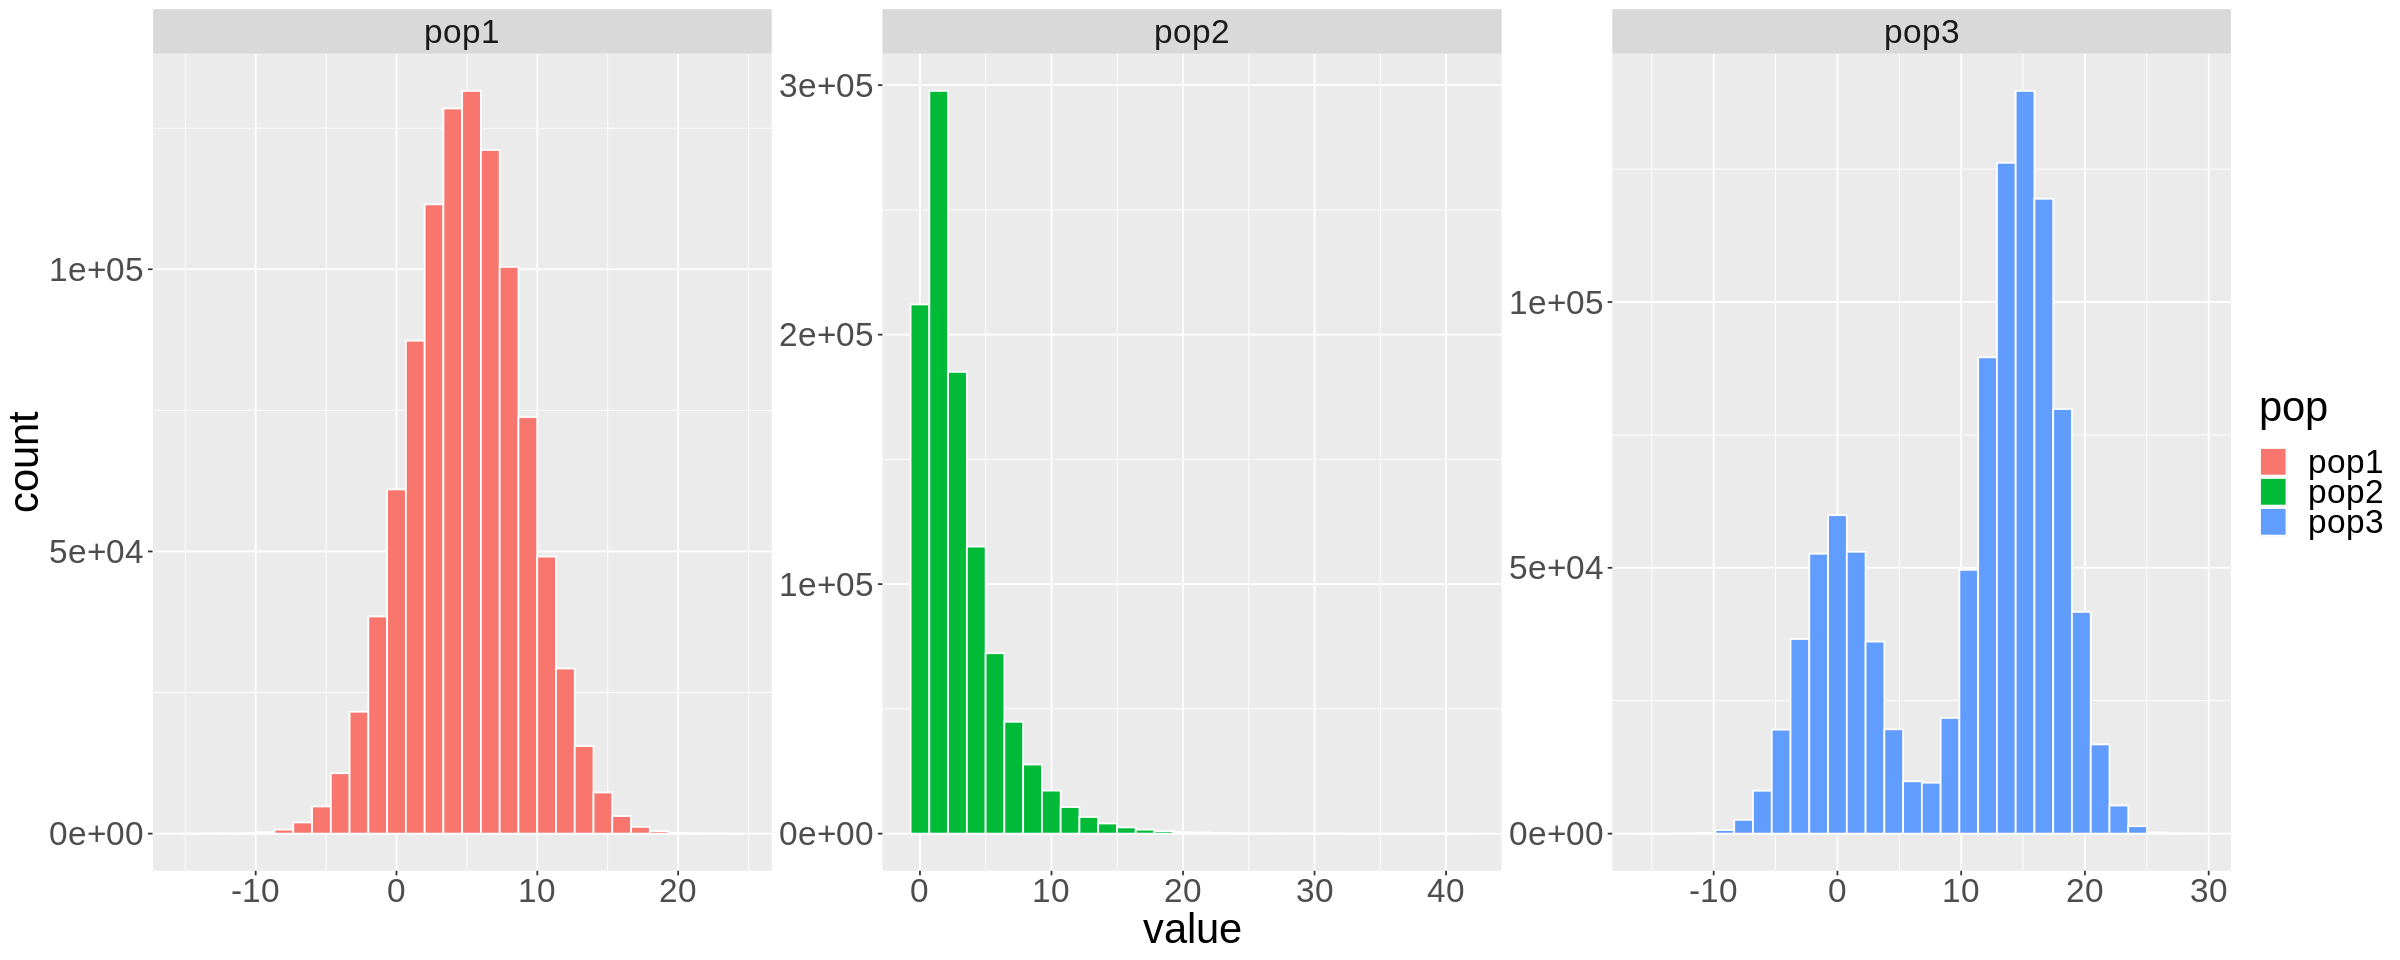

In [8]:
# Run this cell before continuing.
options(repr.plot.width = 20, repr.plot.height = 8)

N <- 10e5 # pop size
pops <- 
    tibble(pop1 = rnorm(N, 5, 4),
           pop2 = rexp(N, 1/3),
           pop3 = rnorm(N, rbernoulli(N,0.7)*15, 3)) %>% 
    pivot_longer(cols = starts_with('pop'), names_to = 'pop')

pops_plot <- 
    pops %>% 
    ggplot() + 
    geom_histogram(aes(value, fill=pop), color='white') + 
    facet_wrap(~pop, scales = "free") +
    theme(text = element_text(size=25)) 

pops_plot

To check how the sample mean changes as the sample size increases, we are going to take a sample of size 15 and calculate the sample mean, then include another random element from the population and calculate the sample mean, and so on, all the way up to a sample size of 5000. We are going to do this process five times for each of the population. The code has already been written for you in the cell below.

In [9]:
set.seed(7812653)
law_large_numbers <- 
    pops %>% 
    group_by(pop)  %>% 
    group_modify(~rep_sample_n(.x, size = 5000, reps = 5)) %>%
    group_by(pop, replicate) %>% 
    mutate(sample_size = row_number(), mean = cummean(value),replicate = as_factor(replicate)) %>% 
    filter(sample_size > 5)

# Let's take a peek in a few of the rows
law_large_numbers %>% slice_sample(n = 1)

pop,replicate,value,sample_size,mean
<chr>,<fct>,<dbl>,<int>,<dbl>
pop1,1,7.0327284,2653,4.997423
pop1,2,8.7963769,41,5.540354
pop1,3,5.1459934,2094,4.905159
pop1,4,-0.8092159,4602,4.967043
pop1,5,6.5481731,1232,4.931338
pop2,1,3.4214232,3376,3.124162
pop2,2,1.0509012,4441,2.963286
pop2,3,7.2622649,4456,2.993139
pop2,4,4.3420350,2746,2.942054


We now have all the data that we need, but we cannot make sense of it in a data frame. Your job is to plot this data using `geom_line`, for each population and each replication, how the mean is changing as the sample size increase. The scaffolding below was written to assist you. 
```r
law_large_numbers_plot <- 
    law_large_numbers %>% 
    ggplot() + 
    geom_line(aes(x = ..., y = ..., color = replicate), alpha=.75) +
    xlab(...) + # What is the xlab?
    ylab(...) + # What is the ylab?
    geom_hline(data = tibble(pop=c("pop1", 'pop2', 'pop3'), true_mean=c(5, 3, 0.7*15)),
               aes(yintercept = true_mean)) +                
    facet_wrap(~pop, scales="free", nrow = 1) +
    ggtitle("Sample mean for different sample sizes and population distribution (black line is the population mean)") + 
    theme(text = element_text(size=20))
```


_Assign your plot to an object called `law_large_numbers_plot`._

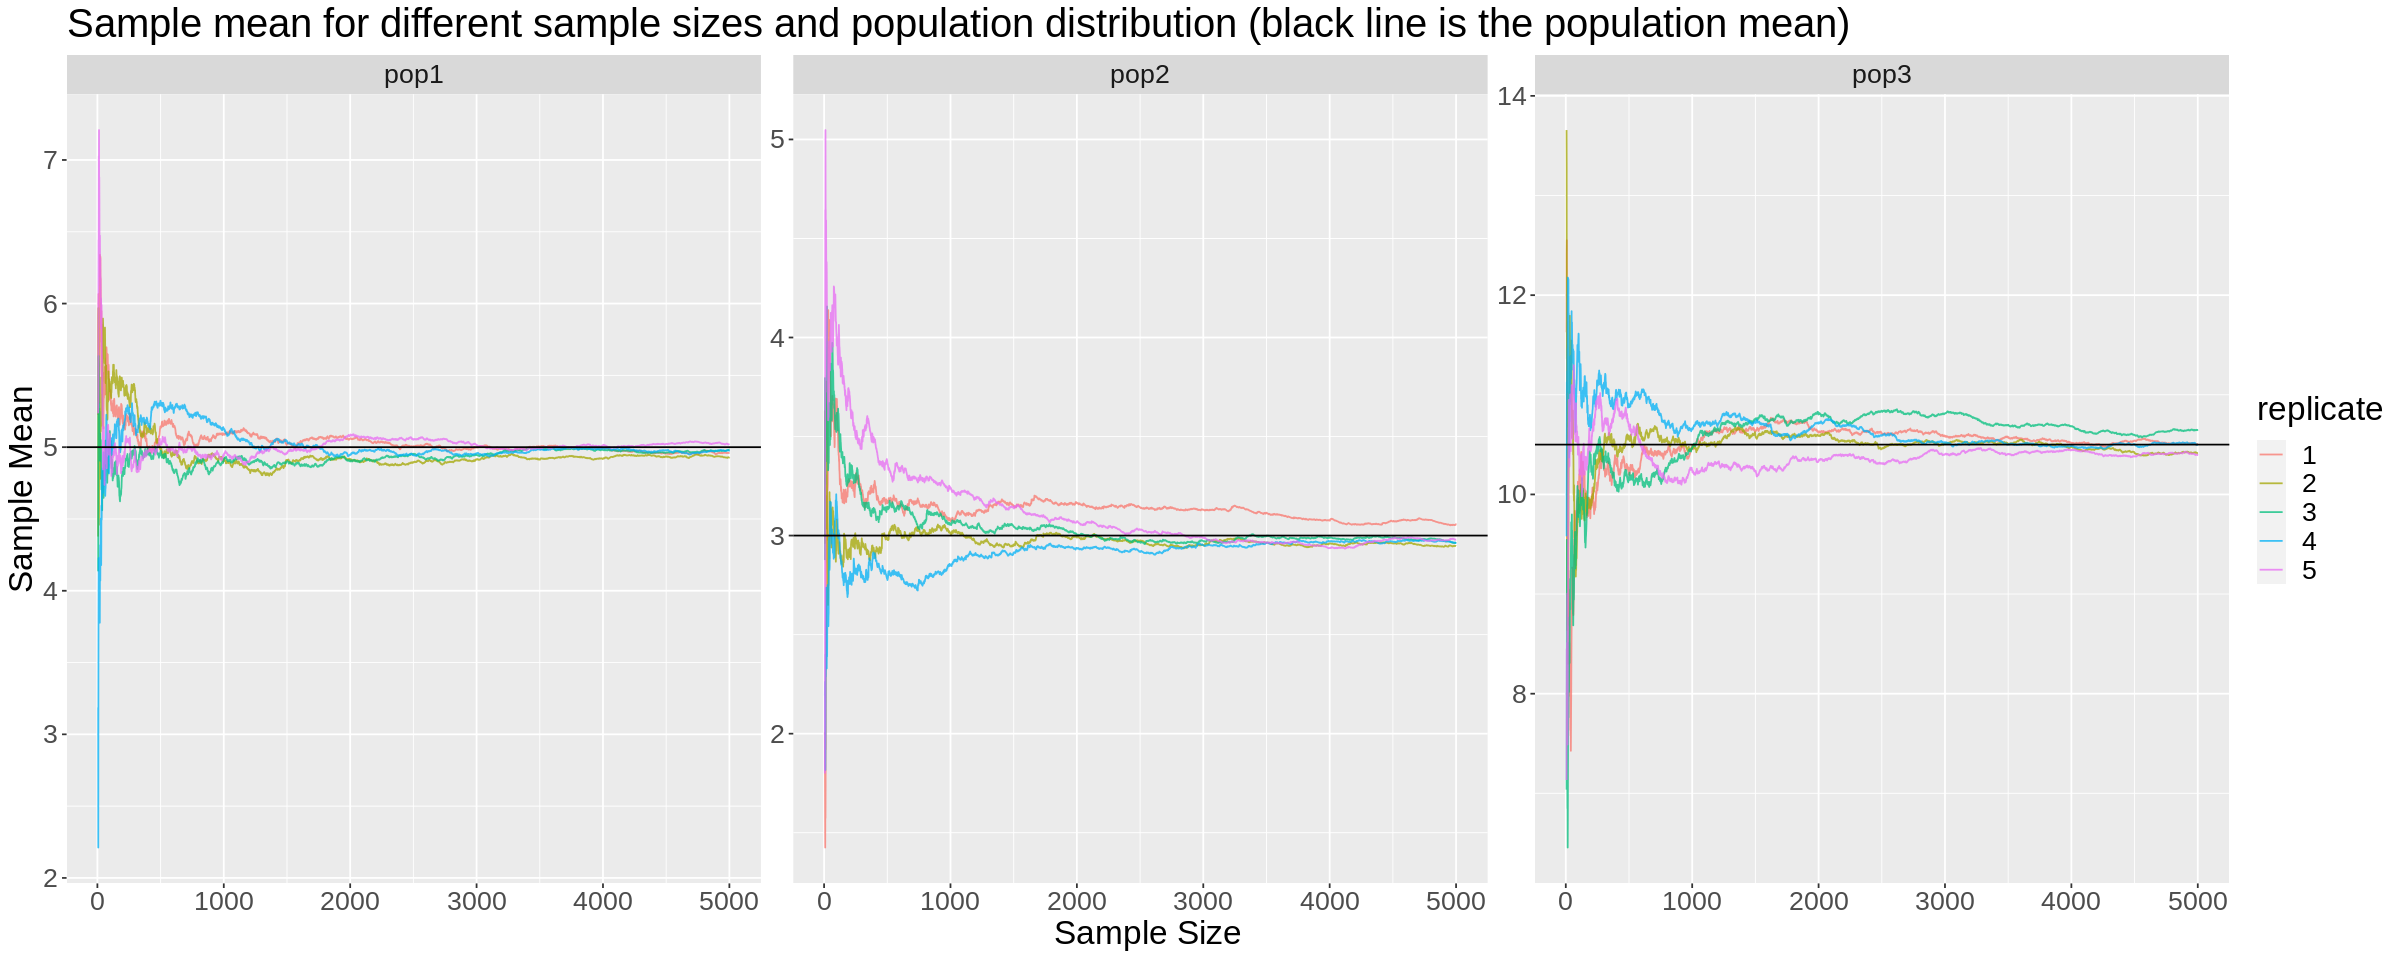

In [10]:
set.seed(54652) # Do not change this.

### BEGIN SOLUTION
law_large_numbers_plot <- 
    law_large_numbers %>% 
    ggplot() + 
    geom_line(aes(x = sample_size, y = mean, color = replicate), alpha=.75) + 
    xlab("Sample Size") + 
    ylab("Sample Mean") +
    geom_hline(data = tibble(pop=c("pop1", 'pop2', 'pop3'), true_mean=c(5, 3, 0.7*15)),
               aes(yintercept = true_mean)) +                
    facet_wrap(~pop, scales="free", nrow = 1) +
    ggtitle("Sample mean for different sample sizes and population distribution (black line is the population mean)") + 
    theme(text = element_text(size=20))
 
### END SOLUTION

law_large_numbers_plot

In [11]:
test_2.1.1()

[1] "Success!"


**Question 2.1.2**
<br>{points: 1}

Considering the effects of increasing the sample size has on the sample mean, which of the statements below is **not** true:

A. By increasing the sample size, the sampling distribution becomes narrower.

B. By sufficiently increasing the sample size, it is possible to <em><u>guarantee</u></em> (with probability 1!) that the sample mean is as close as we want from the populational mean, regardless of the population distribution. 

C. By increasing the sample size, the centre of the sampling distribution becomes closer and closer to the true mean.

D. For any given sample size, the population distribution affects how much the sample mean varies.

_Assign your answer to an object called `answer2.1.2`. Your answer should be a single character surrounded by quotes._

In [12]:
# answer2.1.2 <- ...

### BEGIN SOLUTION
answer2.1.2 <- "C"
### END SOLUTION

In [13]:
test_2.1.2()

[1] "Success!"


## 2.2 Normal (also known as Gaussian) distribution

By plotting the histogram of a population, we can check the population distribution. The population distribution is a key part of statistical inference, mainly because it affects the estimator's sampling distribution. So far in the course, we haven't made any assumptions about the population distribution. Instead, to study the sampling distribution, we used bootstrap. 

In many situations, however, it is reasonable to approximate the exact population distribution, which is unknown, by a theoretical probability distribution. You can think of it as having the formula to approximate the histogram of the population distribution. In fact, you might see people referring to probability distributions as a population.

There is one probability distribution that is especially important: the Normal distribution. Besides being very common in practice (i.e., it is a good model to be applied in a broad range of problems), the Central Limit Theorem (you will study next section) makes the Normal distribution a fundamental part of Statistics.

In this section, you are going to study the Normal distribution.


**Question 2.2.1**
<br> {points: 1}

For this exercise, we are going to use the wings' length of houseflies (made available by [Seattle Central](https://seattlecentral.edu/qelp/sets/057/s057.pdf) from [this paper](https://academic-oup-com.ezproxy.library.ubc.ca/aesa/article-abstract/48/6/499/26366?redirectedFrom=fulltext) -- we have the code to download it for you in the cell below). Naturally, this is not the population; however, let us consider this as our population for the sake of discussion. Your job is to fill in the scaffolding below to plot the population distribution. Make sure you don't change the binwidth.

```r
pop_dist_flies <- 
    houseflies %>% 
    ...() + 
    ...(aes(x = ..., y = ..density..), color = 'white', binwidth = 0.198)+
    theme(text = element_text(size=25)) +
    xlab(...) +
    ylab(...) + 
    ggtitle(...)
```

_Assign your plot to an object called `pop_dist_flies`._

In [14]:
# Run this cell before continuing.
houseflies <- 
    read_table("https://seattlecentral.edu/qelp/sets/057/s057.txt", col_names = 'wings_length') %>% 
    mutate(wings_length = wings_length/10)

pop_mu = 4.55  # Ignore this for now.
pop_sd = 0.391964747951093 # Ignore this for now.

Parsed with column specification:
cols(
  wings_length = col_double()
)



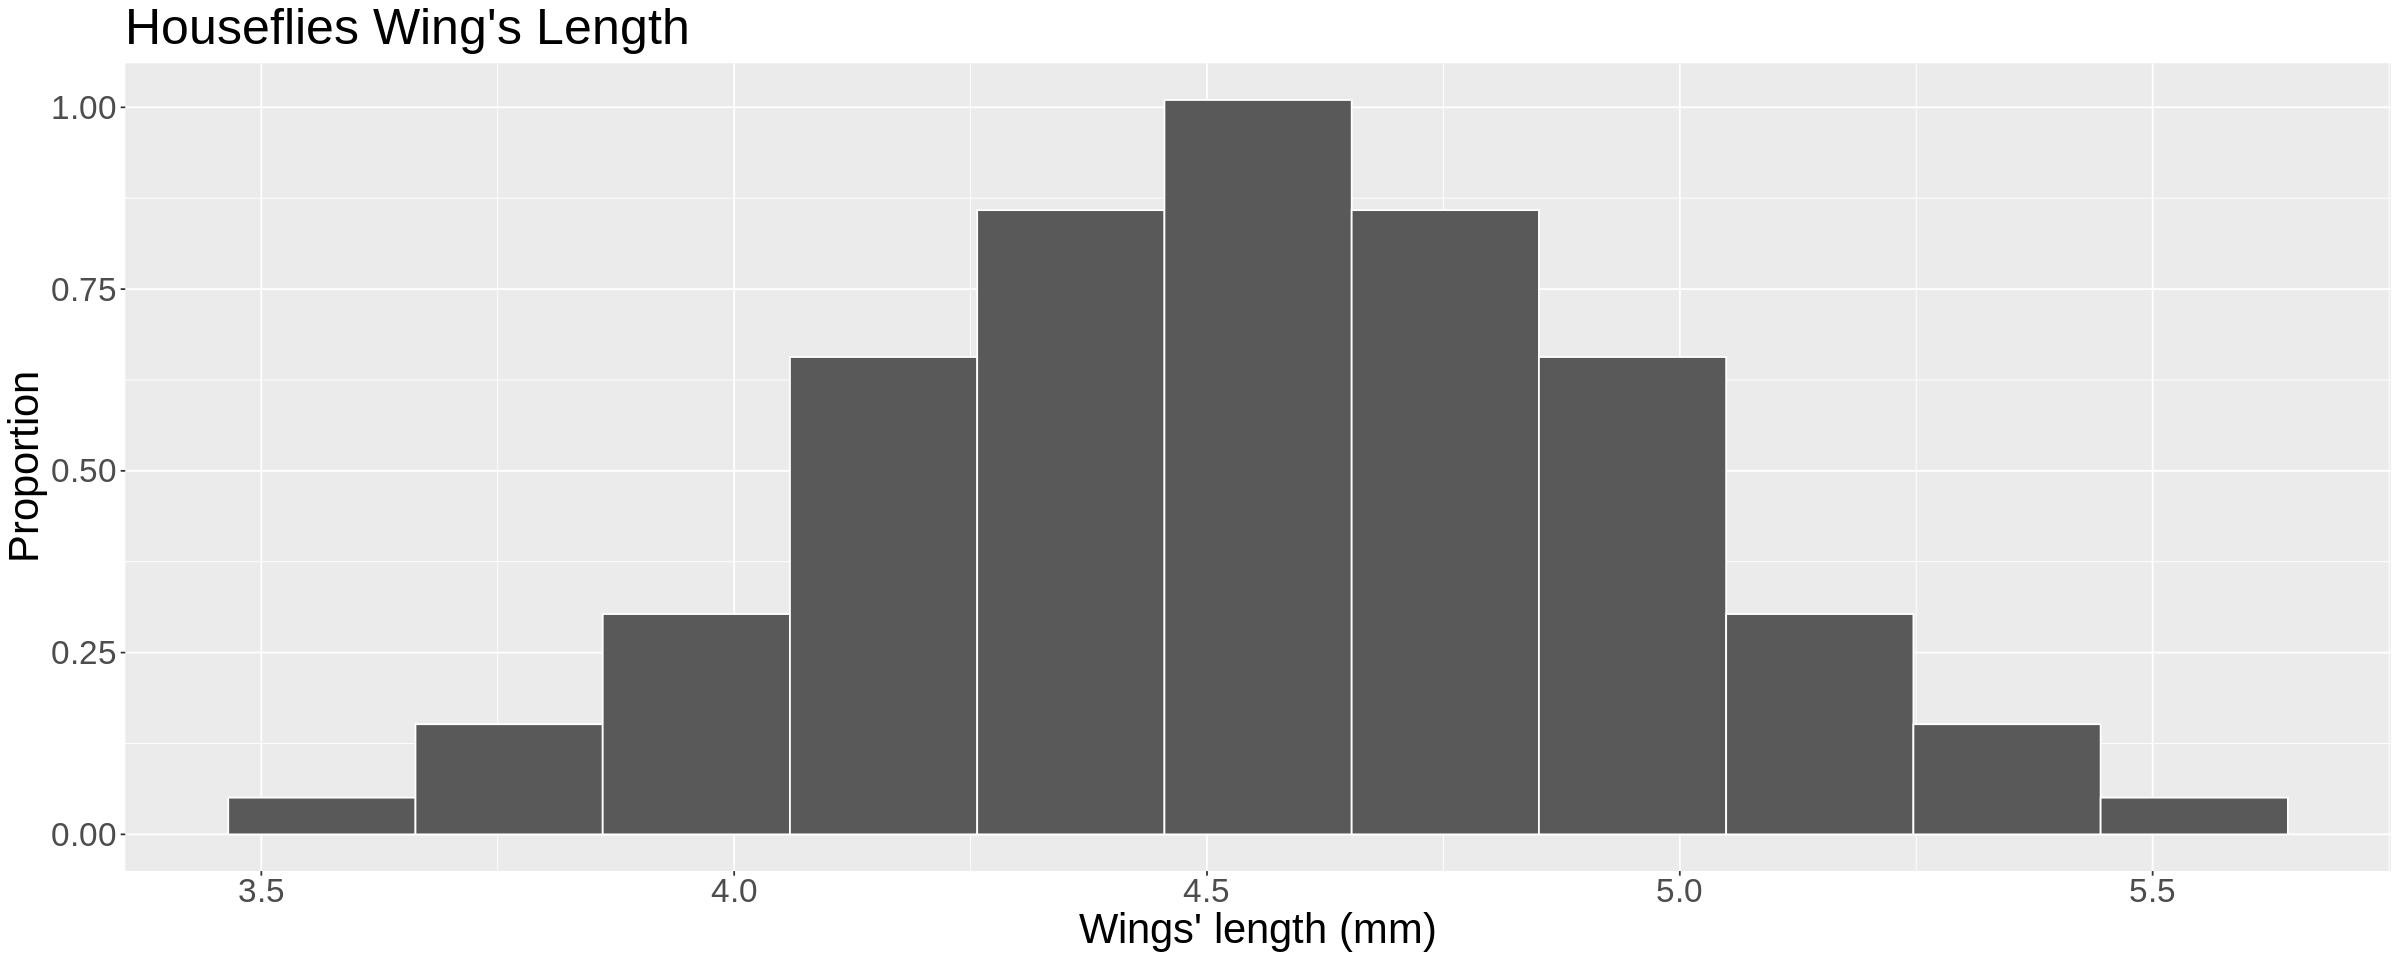

In [15]:
### BEGIN SOLUTION
pop_dist_flies <- 
    houseflies %>% 
    ggplot() + 
    geom_histogram(aes(wings_length, y = ..density..), color = 'white', binwidth = 0.198)+
    theme(text = element_text(size = 25)) +
    xlab("Wings' length (mm)") +
    ylab("Proportion") + 
    ggtitle("Houseflies Wing's Length")
### END SOLUTION

pop_dist_flies

In [16]:
test_2.2.1()

[1] "Success!"


**Question 2.2.2**
<br> {points: 1}

In this exercise, you will check the shape of the Normal distribution and compare it with the histogram of the population distribution. In the cell below, we prepared a `tibble` for you with the values of the Normal density (i.e., the formula that will approximate the population distribution). Your job is to fill in the scaffolding below to add the  Normal density to the population histogram you obtained in the previous exercise.

```r
pop_dist_normal <- 
    pop_dist_flies + 
    geom_line(data = ..., aes(..., ...), color="red", lwd = 2)

```

What do you think? Is the Normal distribution a good approximation for the population distribution?

_Assign your plot to an object called `pop_dist_normal`._

In [17]:
# Run this cell before continuing
data_normal <- tibble(wings_length=seq(min(houseflies$wings_length), 
                                             max(houseflies$wings_length),0.01), density = dnorm(wings_length, pop_mu, pop_sd))
head(data_normal)

wings_length,density
<dbl>,<dbl>
3.60,0.05396145
3.61,0.05738476
3.62,0.06098554
3.63,0.06477009
3.64,0.06874473
3.65,0.07291581


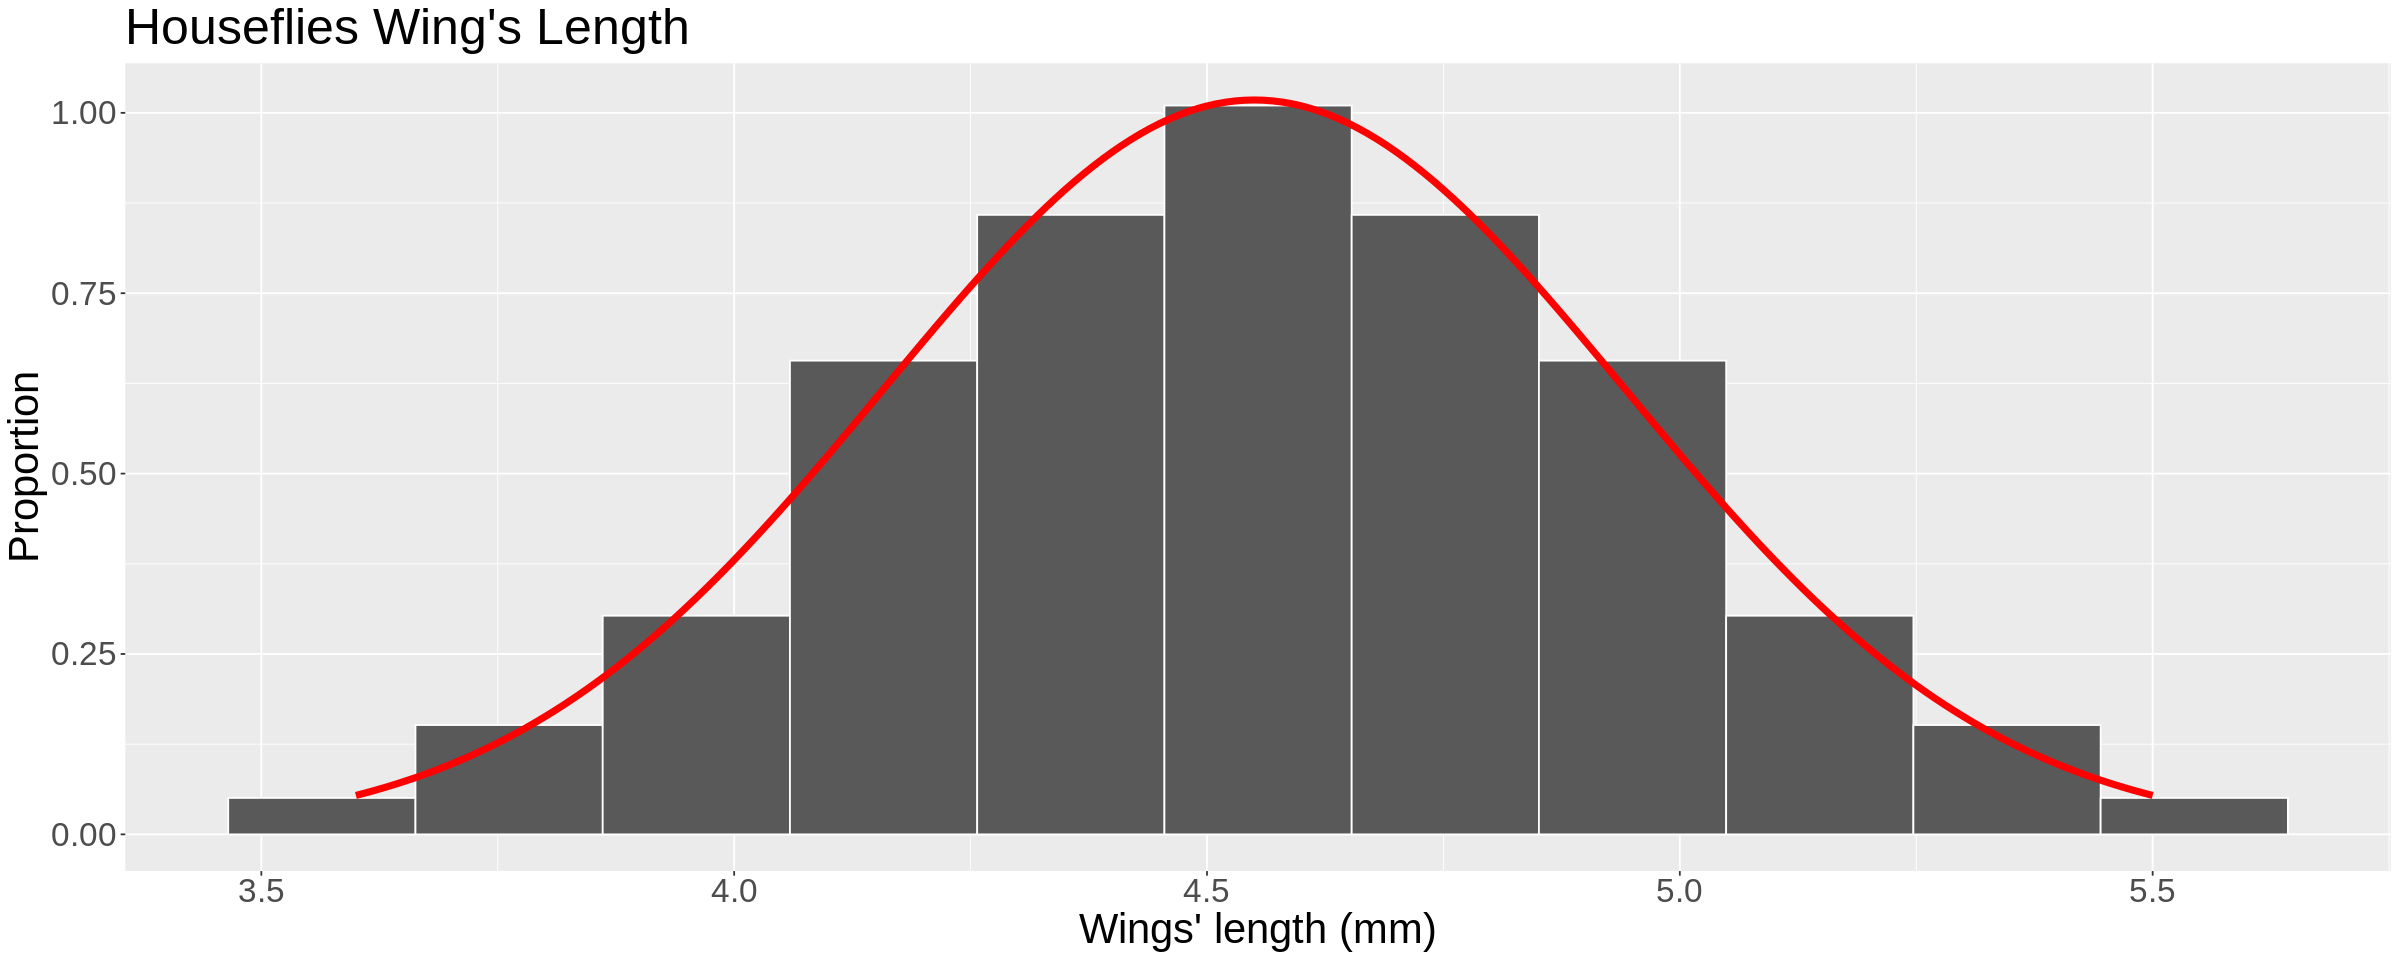

In [18]:
### BEGIN SOLUTION
pop_dist_normal <- 
    pop_dist_flies + 
    geom_line(data = data_normal, aes(wings_length, density), color="red", lwd=2)
### END SOLUTION

pop_dist_normal

In [19]:
test_2.2.2()

[1] "Success!"


**Question 2.2.3**
<br>{points: 1}

The Normal distribution family is indexed by two parameters $\mu$ (read *mu*) and $\sigma$ (read *sigma*). In this exercise, your job is to investigate how changing $\mu$, and $\sigma$ affects the Normal density. To help you investigate the role of the parameters, we prepared a function that will return the `data_normal` tibble with the parameters you specified. Then, you can plot the new curve. The scaffolding below will also include the Normal curve with parameter *mu* = 0 and *sigma* = 1, which is called the Standard Normal curve. Try different values for $mu$ and $sigma$ (note: $\sigma$ must be a positive number, but $\mu$ can be anything). 

After you investigate the role of the parameters, select the statements below that are true (select all that apply): 

A. The parameter $\mu$ controls how wide the curve is, while the parameter $\sigma$ controls its location.

B. The parameter $\mu$ controls the location of the curve, while the parameter $\sigma$ controls its spread.

C. As $\mu$ increases, the Normal curve becomes narrower. 

D. As $\sigma$ increases, the Normal curve becomes wider. 

_Assign your answer to an object called `answer2.2.3`. Your answer should all selected letters above surrounded by quotes (e.g., a possible solution is `"ABCD"`)._

In [20]:
# Run this before continuing

#' Generate the data_normal tibble for a given mu and sigma of your choice
#'
#' @param mu The desired mu value you want (it can be anything).
#' @param sigma The desired sigma value you want (it must be higher than 0)
#' @return Returns the data_normal tibble with two columns: wings_length and density.
create_data_normal <- function(mu, sigma){
    return(tibble(x = seq(mu - 4 * sigma, mu + 4 * sigma, 0.01), 
                  density = dnorm(x, mu, sigma)))
}

In [21]:
# Use this cell for your experiments (uncomment the lines below)

#    ggplot() + 
#    geom_line(data = create_data_normal(mu = 0, sigma = 1), aes(x, density), color = "black", lwd = 2) + 
#    geom_line(data = create_data_normal(mu = ..., sigma = ...), aes(x, density), color = "red", lwd = 2) + 


In [22]:
# Your solution here:
# answer2.2.3 <- ...

### BEGIN SOLUTION
answer2.2.3 <- "BD"
### END SOLUTION

In [23]:
test_2.2.3()

[1] "Success!"


**Question 2.2.4** 
<br> {points: 1}

The Normal distribution has an interesting property: regardless of the values of $\mu$ and $\sigma$, we have that:

- Approximately 68% of the observations are between $[\mu -\sigma; \mu+\sigma]$.
- Approximately 95.5% of the observations are between $[\mu -2\sigma; \mu+2\sigma]$.
- Approximately 99.7% of the observations are between $[\mu -3\sigma; \mu+3\sigma]$.

The cell below illustrate that for you.
Again, these are valid for any value of $\mu$ and $\sigma$. 

In this exercise, you will calculate the proportion of houseflies that have wings between:

- A. $[4.55 - 0.392; 4.55 + 0.392]$
- B. $[4.55 - 2\times0.392; 4.55 + 2\times0.392]$
- C. $[4.55 - 3\times0.392; 4.55 + 3\times0.392]$


What do you think? Are these values similar to the theoretical values?

_Assign your answers to objects called `answer2.2.4_partA`, `answer2.2.4_partB`, and `answer2.2.4_partC`. Your answer should be a single number._

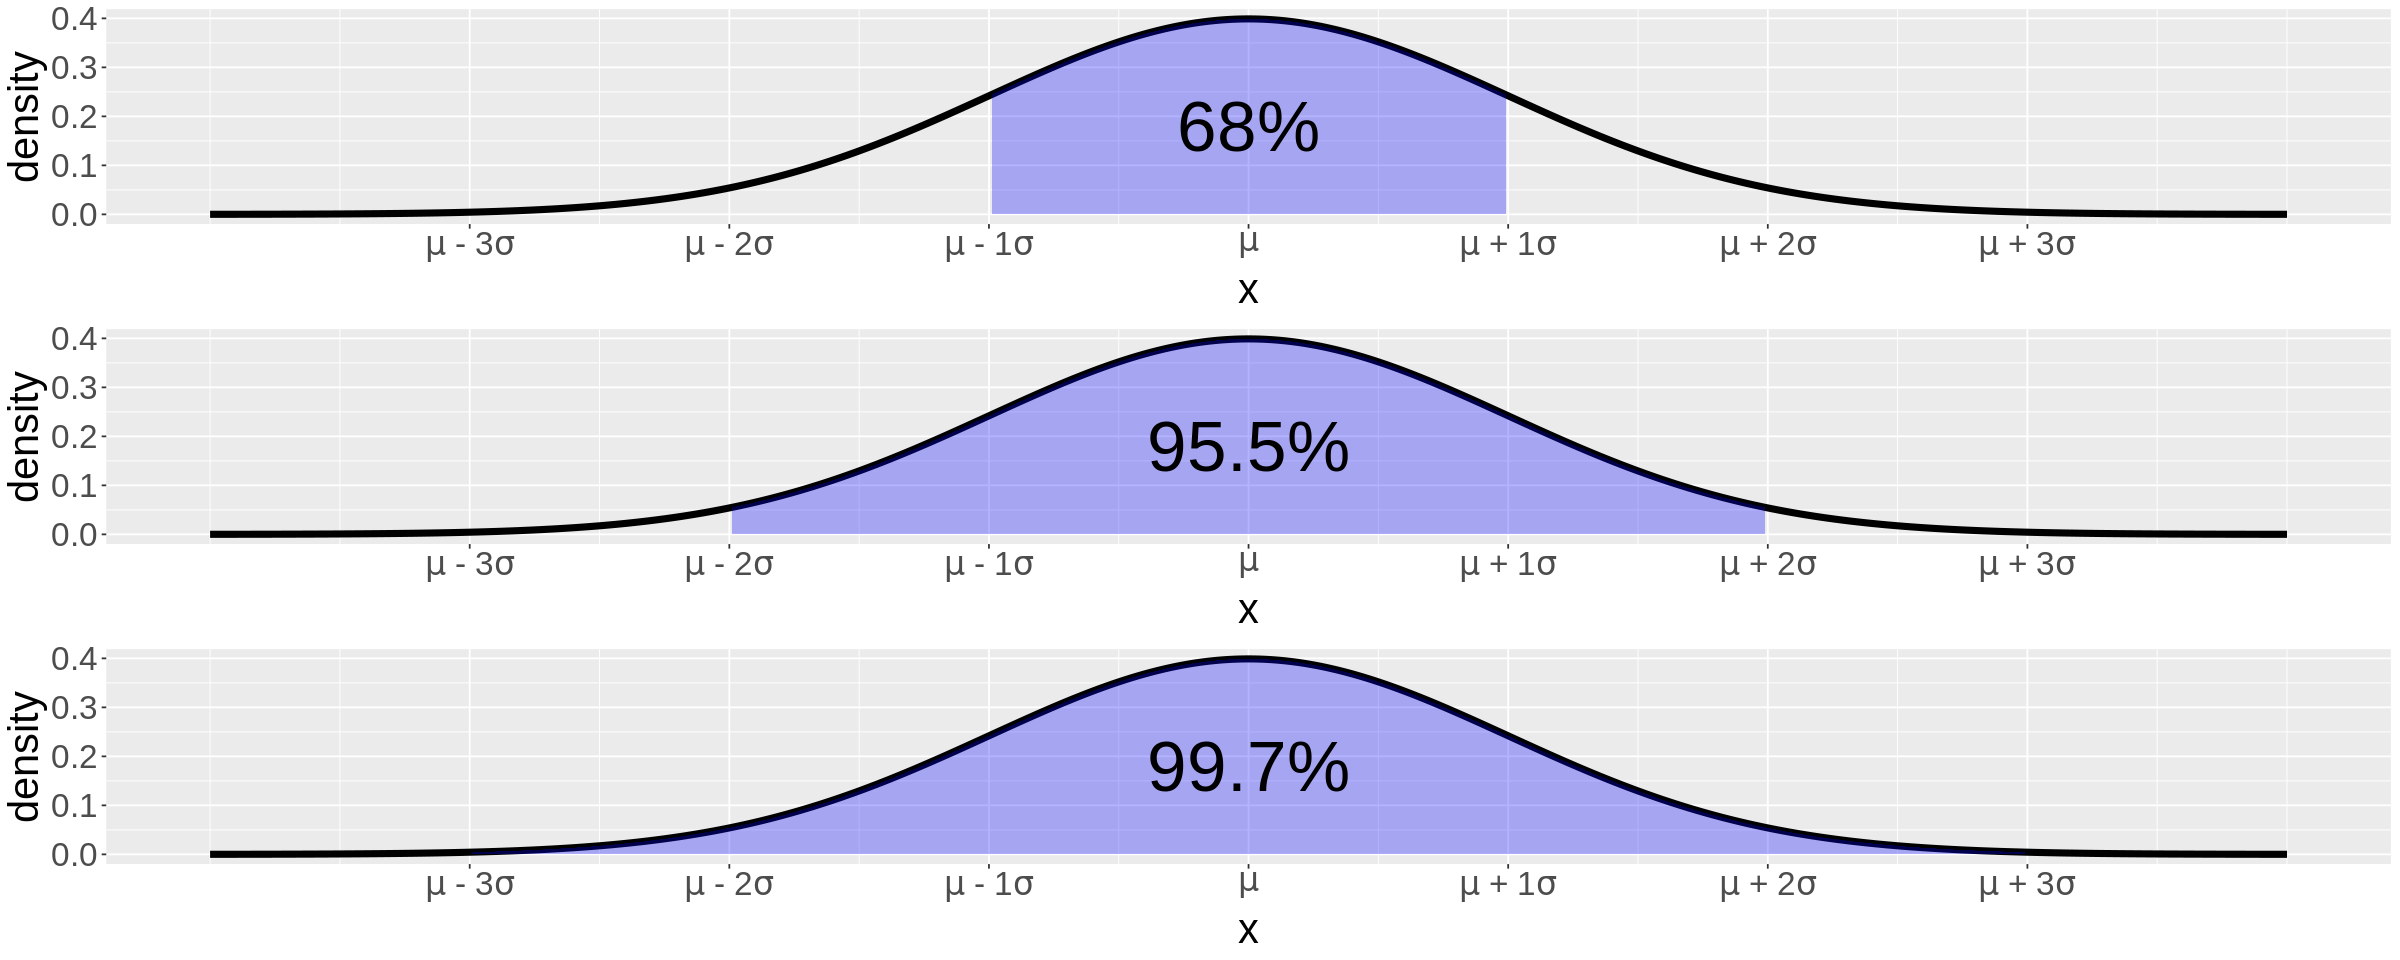

In [24]:
# Run this cell to see the plots

data_normal <- tibble(x = seq(-4, 4, 0.01), density = dnorm(x, 0, 1)) 
plots_normal <- list()
pecentages <- c("68%", "95.5%", "99.7%")
for (i in 1:3){
plots_normal[[i]] <- 
    data_normal %>% 
    ggplot() + 
    geom_line(aes(x, density), lwd=2) + 
    geom_ribbon(data=subset(data_normal, x>-i & x<i), 
                aes(x = x, ymax = density), ymin = 0, alpha = 0.3, fill = "blue") + 
    annotate("text", x = 0, 0.18, label = pecentages[i], size = 15) +
    scale_x_continuous(breaks = c(-3, -2, -1, 0, 1, 2, 3), labels = c(expression(paste(mu, " - 3", sigma)), expression(paste(mu, " - 2", sigma)), expression(paste(mu, " - 1", sigma)),
                                                                      expression(mu),
                                                                      expression(paste(mu, " + 1", sigma)), expression(paste(mu, " + 2", sigma)), expression(paste(mu, " + 3", sigma)))) +
    theme(text = element_text(size=25))
}
do.call("grid.arrange", c(plots_normal, ncol=1))

In [25]:
# (answer2.2.4_partA <- ... )
# (answer2.2.4_partB <- ... )
# (answer2.2.4_partC <- ... )

### BEGIN SOLUTION
(answer2.2.4_partA <- 
    houseflies %>% filter(between(wings_length, left = 4.55 - 0.392, right = 4.55 + 0.392)) %>% nrow() / nrow(houseflies))
(answer2.2.4_partB <- 
    houseflies %>% filter(between(wings_length, left = 4.55 - 2*0.392, right = 4.55 + 2*0.392)) %>% nrow() / nrow(houseflies))
(answer2.2.4_partC <- 
    houseflies %>% filter(between(wings_length, left = 4.55 - 3*0.392, right = 4.55 + 3*0.392)) %>% nrow() / nrow(houseflies))
### END SOLUTION

[1] 0.68

[1] 0.96

[1] 1

In [26]:
test_2.2.4()

[1] "Success!"


**Question 2.2.5** 
<br> {points: 1}

Knowing that the population approximately follows a Normal distribution allows us to find the formula for the sampling distribution of the sample mean. For example, for samples of size $16$ houseflies, we claim that the sampling distribution of the sample mean will follow a Normal distribution with parameters $\mu=4.55$ and $\sigma = \frac{0.392}{4}.$ In this and the next  exercise, you are going to verify if this is (approximately) accurate. 

For this exercise, take 10000 samples of size 16, with replacement, from the `houseflies` data set.

_Assign your data frame to an object called `samples_houseflies`. This data frame should have two columns: `replicate` and `wings_length`._


In [27]:
set.seed(1)

### BEGIN SOLUTION
samples_houseflies <- 
    houseflies %>% 
    rep_sample_n(size = 16, reps = 10000, replace = TRUE)
### END SOLUTION

head(samples_houseflies)

replicate,wings_length
<int>,<dbl>
1,4.7
1,4.4
1,3.6
1,4.4
1,5.0
1,4.5


In [28]:
test_2.2.5()

[1] "Success!"


**Question 2.2.6**
<br> {points: 1}

For each of the samples, you obtained in the previous exercise, calculate the sample mean. Then, plot the histogram of all sample means you obtained and the line for the Normal density. You can use the scaffolding below. 


```r
sampling_dist_mean_houseflies <-
    samples_houseflies %>% 
    group_by(...) %>% 
    summarise(sample_mean = ...) %>% 
    ggplot() + 
    geom_histogram(aes(..., y = ..density..), color='white', binwidth=.05) + 
    theme(text = element_text(size=25)) +
    xlab(...) + 
    geom_line(data = tibble(sample_mean = seq(3.5, 5.8, 0.01), 
              density = dnorm(sample_mean, mean = ..., ...)), 
              aes(..., ...), color = "red", lwd = 2)
```

Take a look at the plot and think about if you would consider this a good approximation. Also, keep in mind that we got the approximation without any simulation, just using the fact that the population was approximately Normally distributed. 

_Assign your plot to an object called `sampling_dist_mean_houseflies`._

`summarise()` ungrouping output (override with `.groups` argument)



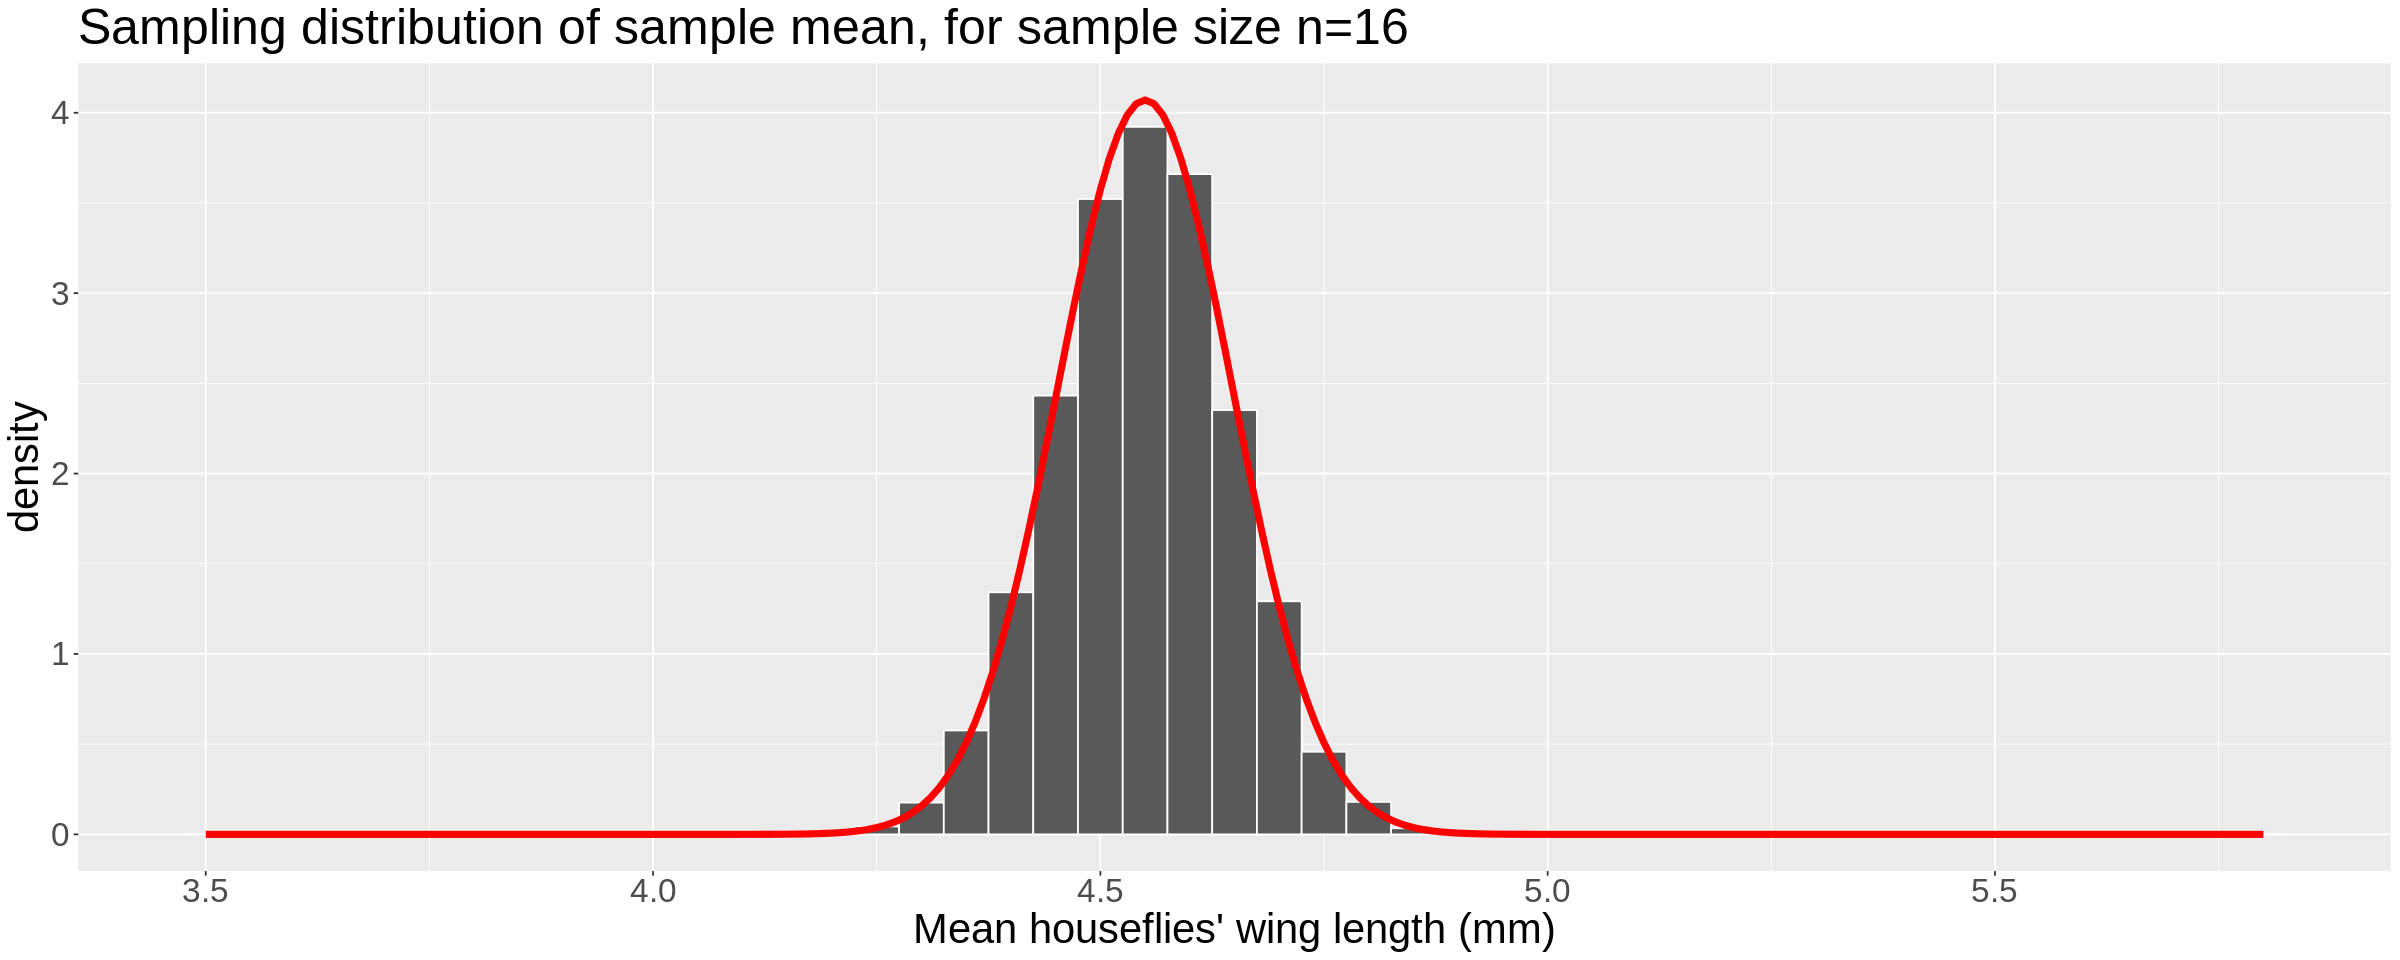

In [29]:
### BEGIN SOLUTION
sampling_dist_mean_houseflies <-
    samples_houseflies %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(wings_length)) %>% 
    ggplot() + 
    geom_histogram(aes(sample_mean, y = ..density..), color='white', binwidth=.05) + 
    theme(text = element_text(size=25)) +
    xlab("Mean houseflies' wing length (mm)") + 
    geom_line(data = tibble(sample_mean = seq(3.5, 5.8, 0.01), density = dnorm(sample_mean, 4.55, 0.392/4)), aes(sample_mean, density), color = "red", lwd = 2) + 
    ggtitle("Sampling distribution of sample mean, for sample size n=16")
### END SOLUTION

sampling_dist_mean_houseflies

In [30]:
test_2.2.6()

[1] "Success!"


## 2.3 Central Limit Theorem (CLT)

In many cases, the Normal distribution will not be a good approximation for the population distribution. So why are we studying the Normal distribution specifically? Because, luckily for us, there is a very strong result in probability, called the Central Limit Theorem, that allows us to approximate the sampling distribution of many estimators by a Normal distribution, even when the population distribution is not Normal. 

<img src="https://media.tenor.com/images/99cff34bdcb675975b2b0cc661f2e4ce/tenor.gif"> 


The Central Limit Theorem roughly states that if you are summing up a very large number of random terms, the distribution of this sum is approximately Normal. For example, when you calculate the sample mean, you are summing the elements of your sample; therefore, if your sample size is large, then the sampling distribution of the sample will be approximately Normal, *regardless of the population distribution*. 

Let us see the Central Limit Theorem in action. In the following exercises, we will study the sampling distribution of the sample mean, using different sample sizes from a peculiar population distribution, which is definitely not Gaussian. The cell below creates said population, stores it in an object named `weird_pop`, and plots its histogram (you do not need to worry about the code in the cell, you just need to run the cell).


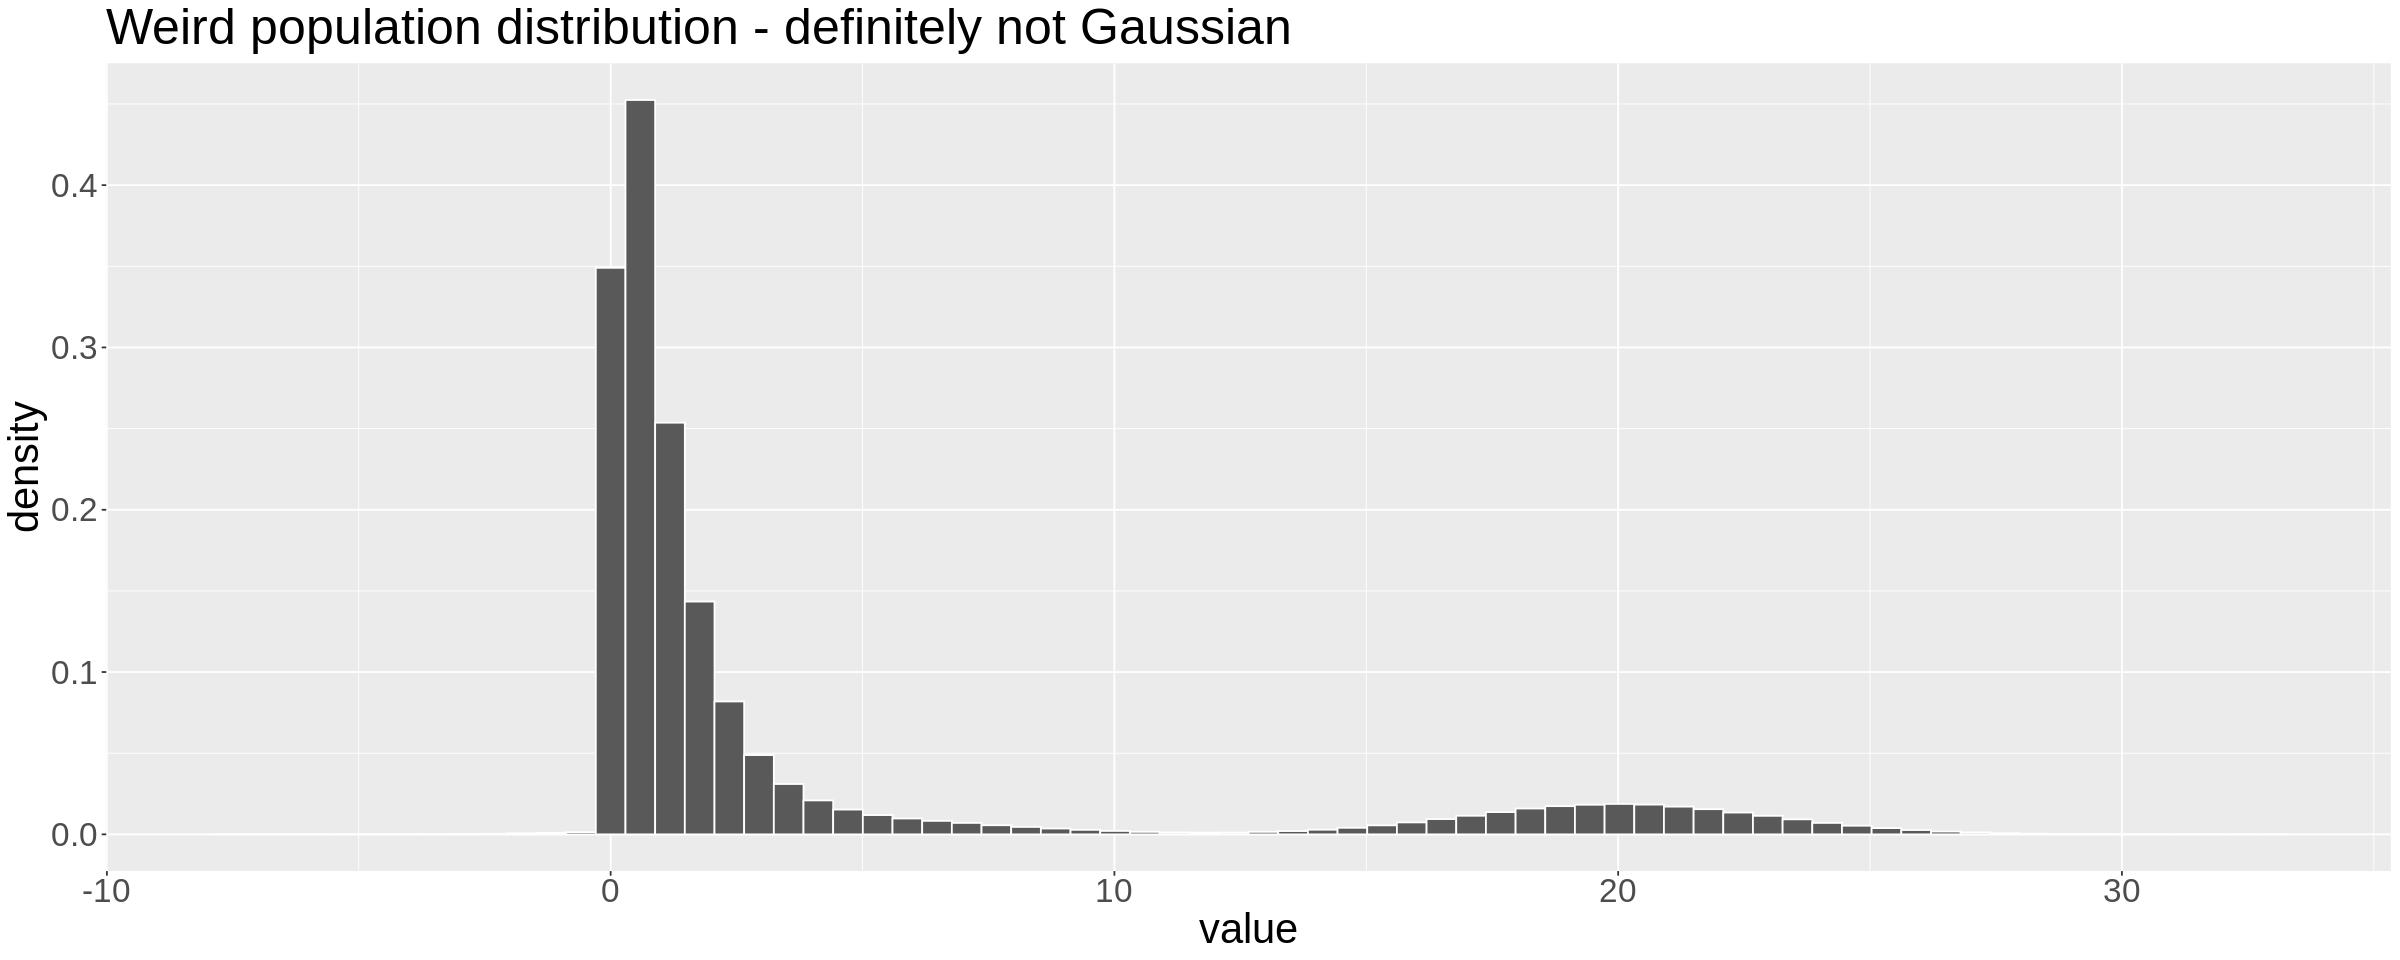

In [31]:
# Run this cell before continuing

set.seed(1)
N <- 10e5 # Pop size
w <- rbernoulli(N, 0.2) # Mixture weights

# Creates the pop
weird_pop <- 
    tibble(value = w*rnorm(N, rbernoulli(N,0.7)*15+5, 3) + (1-w)*rexp(N, 1) )

# Creates the histogram of the weird_pop
weird_pop_plot <-
    weird_pop %>% 
    ggplot() + 
    geom_histogram(aes(x=value, y = ..density..), bins=70, color = "white") +
    theme(text = element_text(size=25)) +
    ggtitle("Weird population distribution - definitely not Gaussian")

# Obtain the density for different values of n.
mu <- mean(weird_pop$value)
sigma <- sd(weird_pop$value)
me <- 4*sigma

gaussian_densities <- 
    tibble(sample_size = c(10, 30, 500), 
           grid = map(.x = sample_size, 
                      .f = ~tibble(value = seq(mu-me/sqrt(.x), mu+me/sqrt(.x), 0.01), 
                                   density = dnorm(value, mu, sigma/sqrt(.x))))) %>% 
    unnest(grid)

# Plot the population distribution
weird_pop_plot

**Question 2.3.1** 
<br> {points: 1}

For this exercise, your job is to take multiple samples, say 3000, of size 10. The samples should be taken without replacement.

_Assign your data frame to an object called `samples_size10`. The data frame should have two columns: `replicate` and `value`_

In [32]:
set.seed(1) # do not change this

### BEGIN SOLUTION
samples_size10 <- 
    weird_pop %>% 
    rep_sample_n(size = 10, reps = 3000)    
### END SOLUTION

head(samples_size10)

replicate,value
<int>,<dbl>
1,1.22698515
1,2.26400448
1,1.10127839
1,3.01897484
1,0.59249140
1,0.05270656


In [33]:
test_2.3.1()

[1] "Success!"


**Question 2.3.2**
<br> {points: 1}

Fill in the scaffolding below to plot the sampling distribution of the sample mean versus the sampling distribution given by the CLT. Check how good the approximation is. 

```r
sampling_dist_size10 <-
    samples_size10 %>% 
    group_by(...) %>% 
    summarise(sample_mean = ..., `.groups` = "drop") %>% 
    ggplot() + 
    geom_histogram(aes(x = ..., y = ..density..), color="white") +
    theme(text = element_text(size = 25))+
    xlab(...) +
    ggtitle("Sampling distribution of the sample mean for samples of size 10 from Weird Population.") + 
    geom_line(data = gaussian_densities %>% filter(sample_size == 10), aes(value, density), color = "red", lwd = 2)
```


_Assign your plot to an object called `sampling_dist_size10`._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



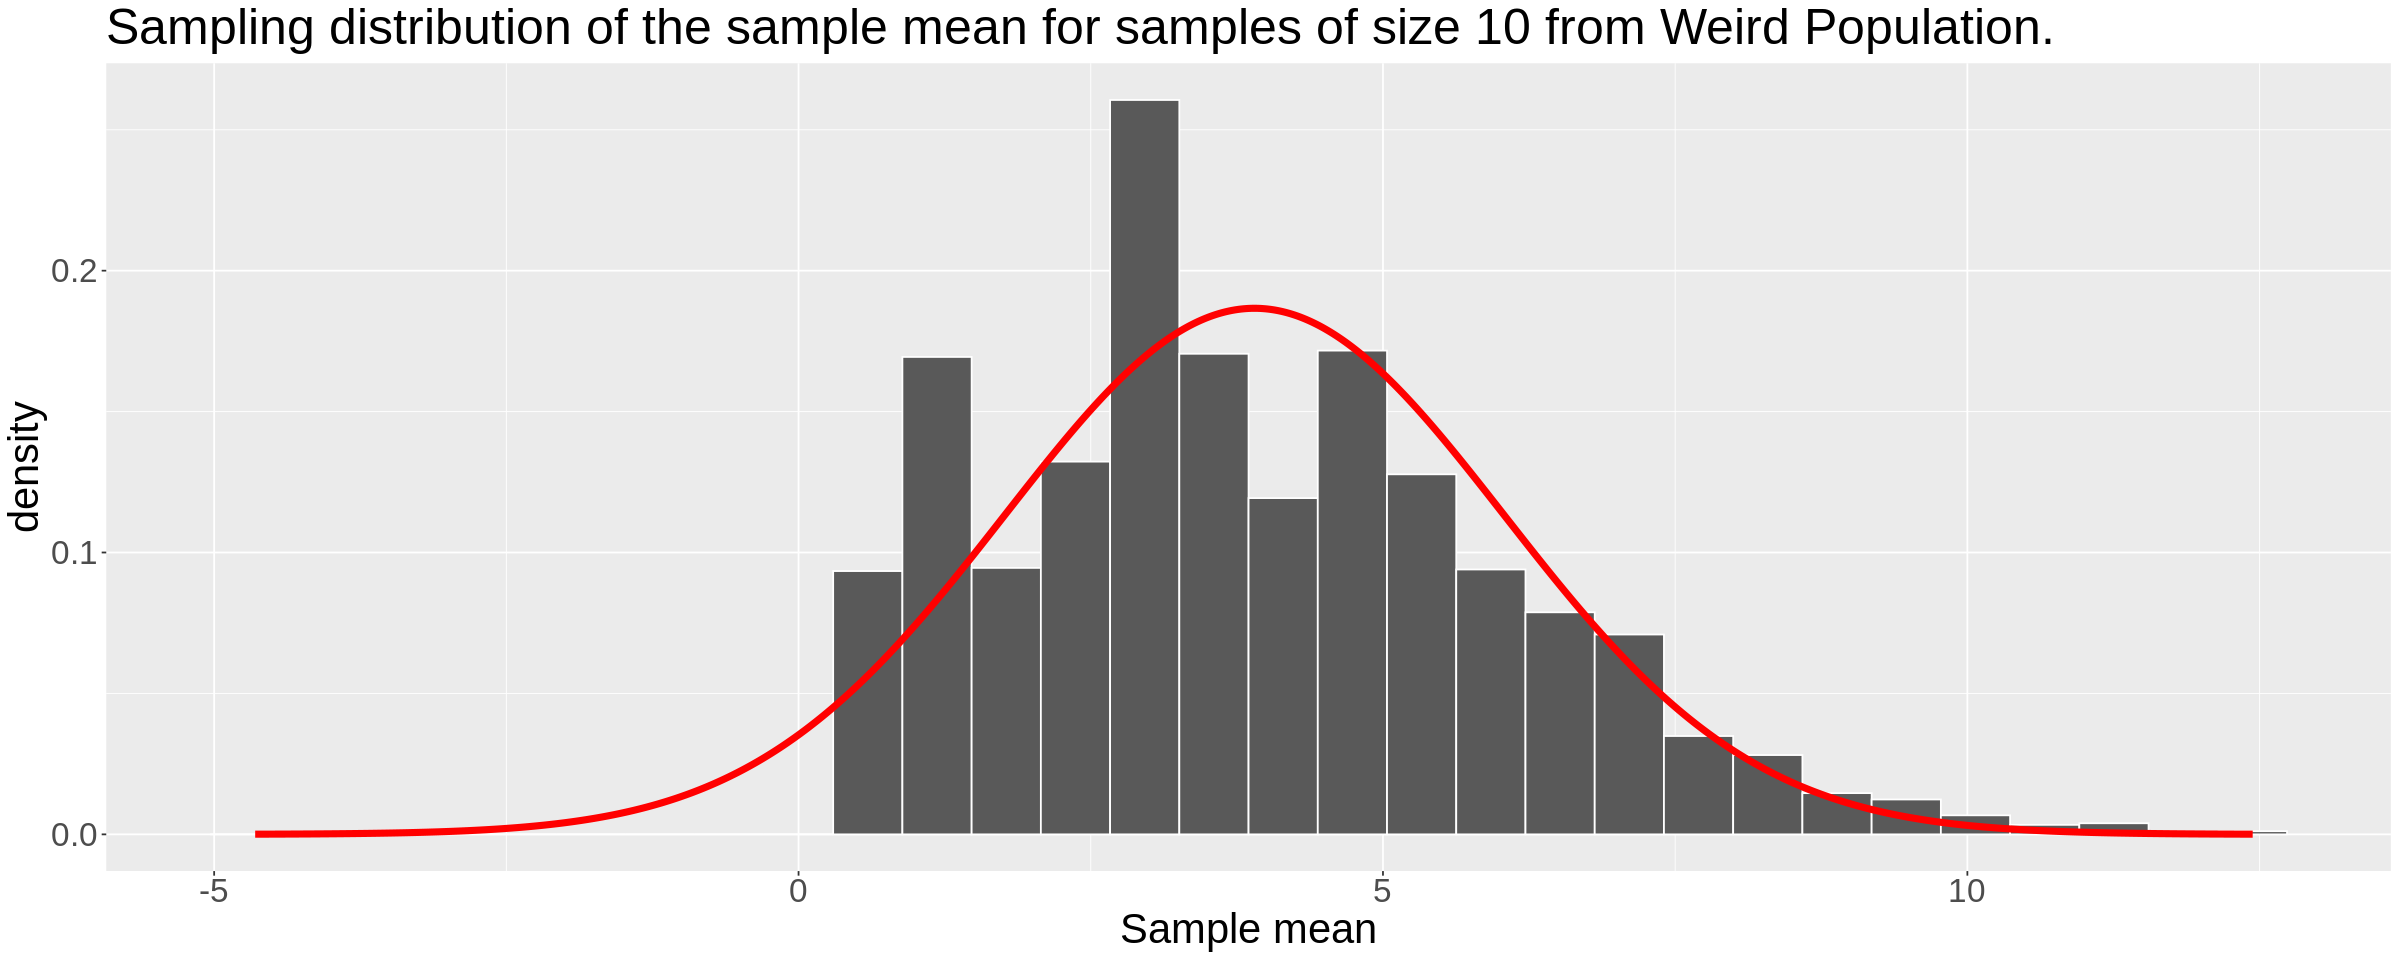

In [34]:
### BEGIN SOLUTION
sampling_dist_size10 <-
    samples_size10 %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(value), `.groups` = "drop") %>% 
    ggplot() + 
    geom_histogram(aes(x=sample_mean, y = ..density..), color="white") +
    theme(text = element_text(size=25))+
    xlab("Sample mean") +
    ggtitle("Sampling distribution of the sample mean for samples of size 10 from Weird Population.") + 
    geom_line(data = gaussian_densities %>% filter(sample_size == 10), aes(value, density), color = "red", lwd = 2)
### END SOLUTION

sampling_dist_size10

In [35]:
test_2.3.2()

[1] "Success!"


**Question 2.3.3** 
<br> {points: 1}

Let us repeat Question 3.2.1, but this time using a much larger sample size. Take 3,000 samples of size 500 from weird_pop. The samples should be taken without replacement.

_Assign your data frame to an object called `samples_size500`. The data frame should have two columns: `replicate` and `value`_

In [36]:
set.seed(2) # Do not change this
### BEGIN SOLUTION
samples_size500 <- 
    weird_pop %>% 
    rep_sample_n(size = 500, reps = 3000)
### END SOLUTION

head(samples_size500)

replicate,value
<int>,<dbl>
1,22.9600079
1,0.9713582
1,0.4242725
1,0.6376692
1,20.9750329
1,0.4736190


In [37]:
test_2.3.3()

[1] "Success!"


**Question 2.3.4**
<br> {points: 1}

Let's take a look at how the CLT approximate the sampling distribution of the sample mean when the sample size is 500. Fill in the scaffolding below to plot the sampling distribution of the sample mean versus the sampling distribution given by the CLT. Check how good the approximation is. 

```r
sampling_dist_size500 <-
    samples_size500 %>% 
    group_by(...) %>% 
    summarise(sample_mean = ..., `.groups` = "drop") %>% 
    ggplot() + 
    geom_histogram(aes(x = ..., y = ..density..), color="white") +
    theme(text = element_text(size = 25))+
    xlab(...) +
    ggtitle("Sampling distribution of the sample mean for samples of size 500 from Weird Population.") + 
    geom_line(data = gaussian_densities %>% filter(sample_size == 500), aes(value, density), color = "red", lwd = 2)
```

_Assign your plot to an object called `sampling_dist_size500`._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



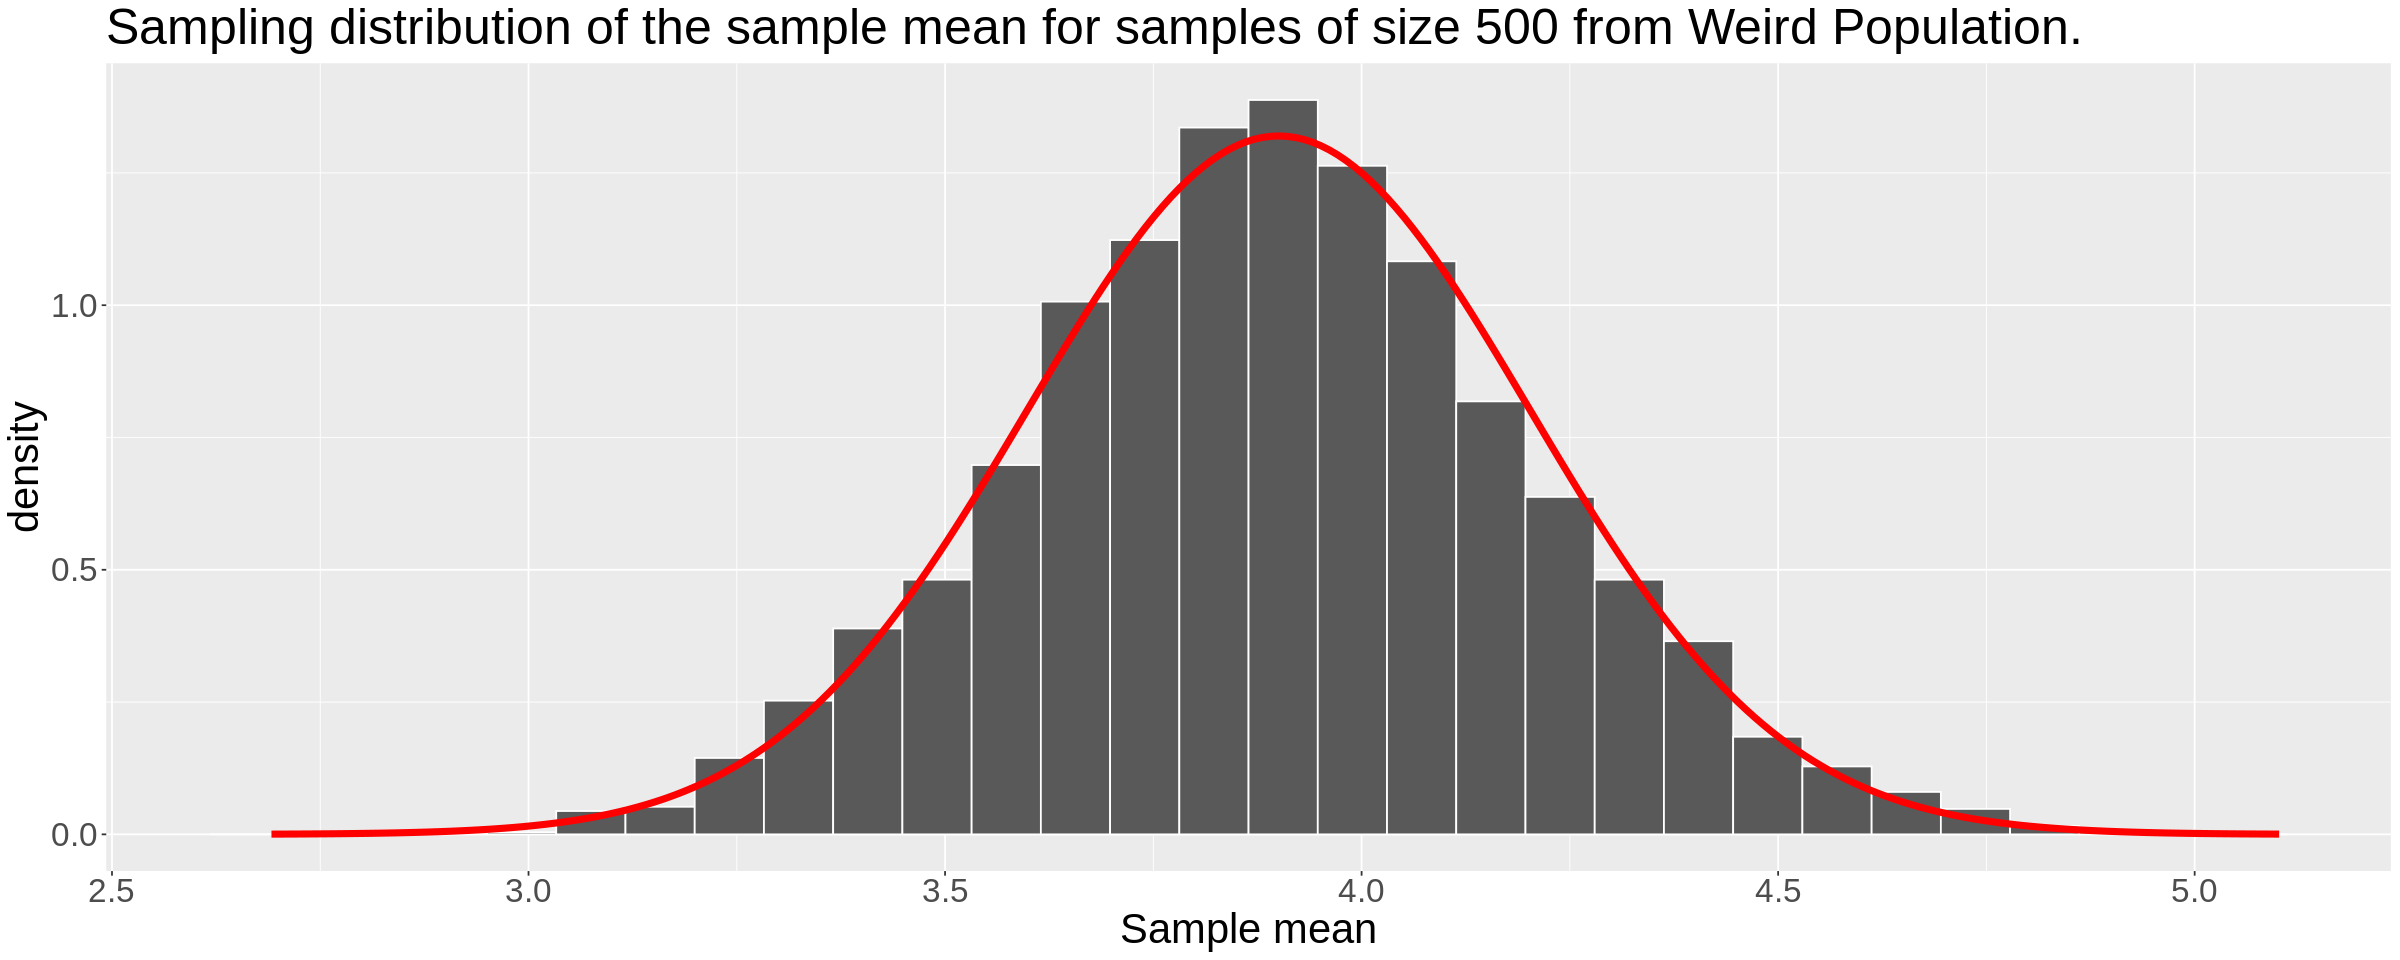

In [38]:
### BEGIN SOLUTION
sampling_dist_size500 <-
    samples_size500 %>% 
    group_by(replicate) %>% 
    summarise(sample_mean = mean(value), `.groups` = "drop") %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), color="white") +
    theme(text = element_text(size = 25))+
    xlab("Sample mean") +
    ggtitle("Sampling distribution of the sample mean for samples of size 500 from Weird Population.") + 
    geom_line(data = gaussian_densities %>% filter(sample_size == 500), aes(value, density), color = "red", lwd = 2)
### END SOLUTION

sampling_dist_size500

In [39]:
test_2.3.4()

[1] "Success!"


The cell below plots the two figures you created in the exercises above and includes the case where the sample size is 30, so you can compare how the approximation is improving as the sample size increases. 

`summarise()` regrouping output by 'sample_size' (override with `.groups` argument)



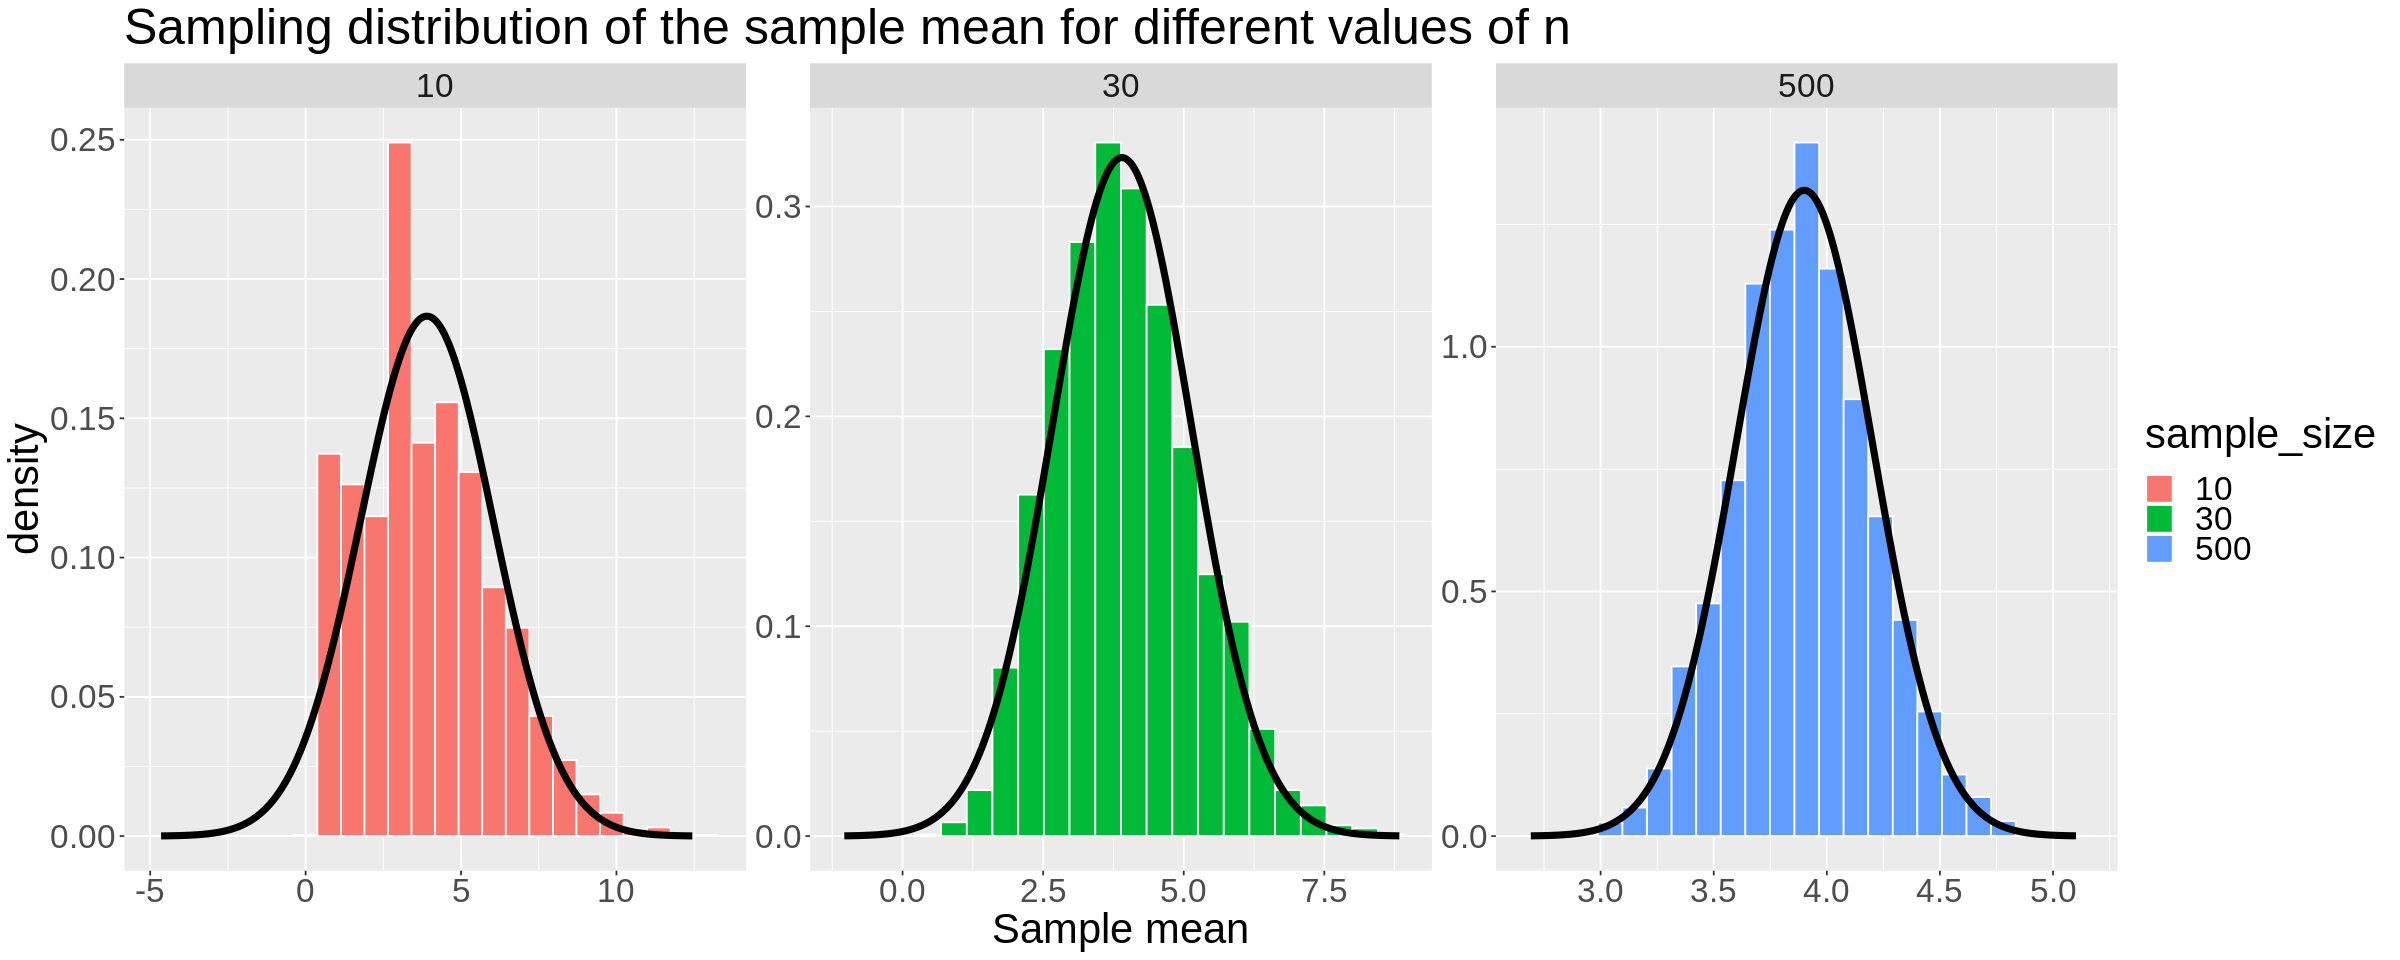

In [40]:
# Run this cell before continuing. 

set.seed(13)

all_samples <- 
    bind_rows(samples_size10 %>% mutate(sample_size = 10), 
              weird_pop %>% rep_sample_n(size = 30, reps = 3000) %>% mutate(sample_size = 30), 
              samples_size500 %>% mutate(sample_size = 500))

all_samples %>% 
    group_by(sample_size, replicate) %>% 
    summarise(sample_mean = mean(value)) %>% 
    select(-replicate) %>% 
    mutate(sample_size = as_factor(sample_size)) %>% 
    ggplot() +
    facet_wrap(~sample_size, scale="free") +
    geom_histogram(aes(x = sample_mean, y = ..density.., fill = sample_size),
                   color='white', 
                   binwidth = function(x) 2 * IQR(x) / (length(x)^(1/4)))+
    theme(text = element_text(size=25)) +
    ggtitle("Sampling distribution of the sample mean for different values of n") +
    geom_line(data = gaussian_densities, aes(x = value, y = density), lwd=2) + 
    xlab("Sample mean")


The question that remains, but it is very hard to answer, is: <em>what sample size is big enough?</em> There is no universal answer. The problem is, although it is true that (some) sampling distributions will converge to a Gaussian distribution no matter what the population distribution looks like, the sample size required to have a good approximation will depend on the population distribution. In most cases, something between 30 or 50 should be enough. But the more different a population distribution is from the Normal distribution (e.g., having multiple peaks, being asymmetric, etc...), the larger the sample size required to have a good approximation. 

In the case of `weird_pop`, we can see that the approximation given by the CLT is quite poor for a sample of size 10. For a sample of size 500, the approximation is quite good. For a sample of size 30, CLT already provides a decent approximation; however, the approximation is not as good on the left tail if you look closely. 

### CLT is not always applicable

It is important to notice that CLT is not magic -- you should not automatically rely on CLT. There are three main things you need to check:
1. Is the size of your sample large enough? 
2. Was the sample taken in an independent fashion? 
3. Is the estimator being used a sum of random components? 

We have discussed the effects of the sample size in the previous exercises. Now, we will see an example of an estimator that is not a sum of random components, and therefore, you cannot use the CLT.

**Question 2.3.5** 
<br> {points: 1}

For this exercise, you are going to estimate the `minimum` of the population. To estimate the population minimum, we are going to use the sample minimum. Let us study the sampling distribution of the sample minimum. You have already drawn samples of different sizes. They are stored now in the object `all_samples`. Complete the scaffolding below to plot the sampling distribution of the sample minimum for different sample sizes. As the sample size increases, does the sampling distribution looks more like a Normal distribution?

```r
sampling_dist_min <- 
    all_samples %>% 
    group_by(..., ...) %>% 
    summarise(sample_min = ..., `.groups` = "drop") %>% 
    ggplot() +
    geom_histogram(aes(x = ..., y = ..density..), color = "white") +
    facet_wrap(~sample_size, scales = "free") +
    theme(text = element_text(size = 25)) + 
    ggtitle(...) + 
    xlab(...)   
```


_Assign your plot to an object called `sampling_dist_min`._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



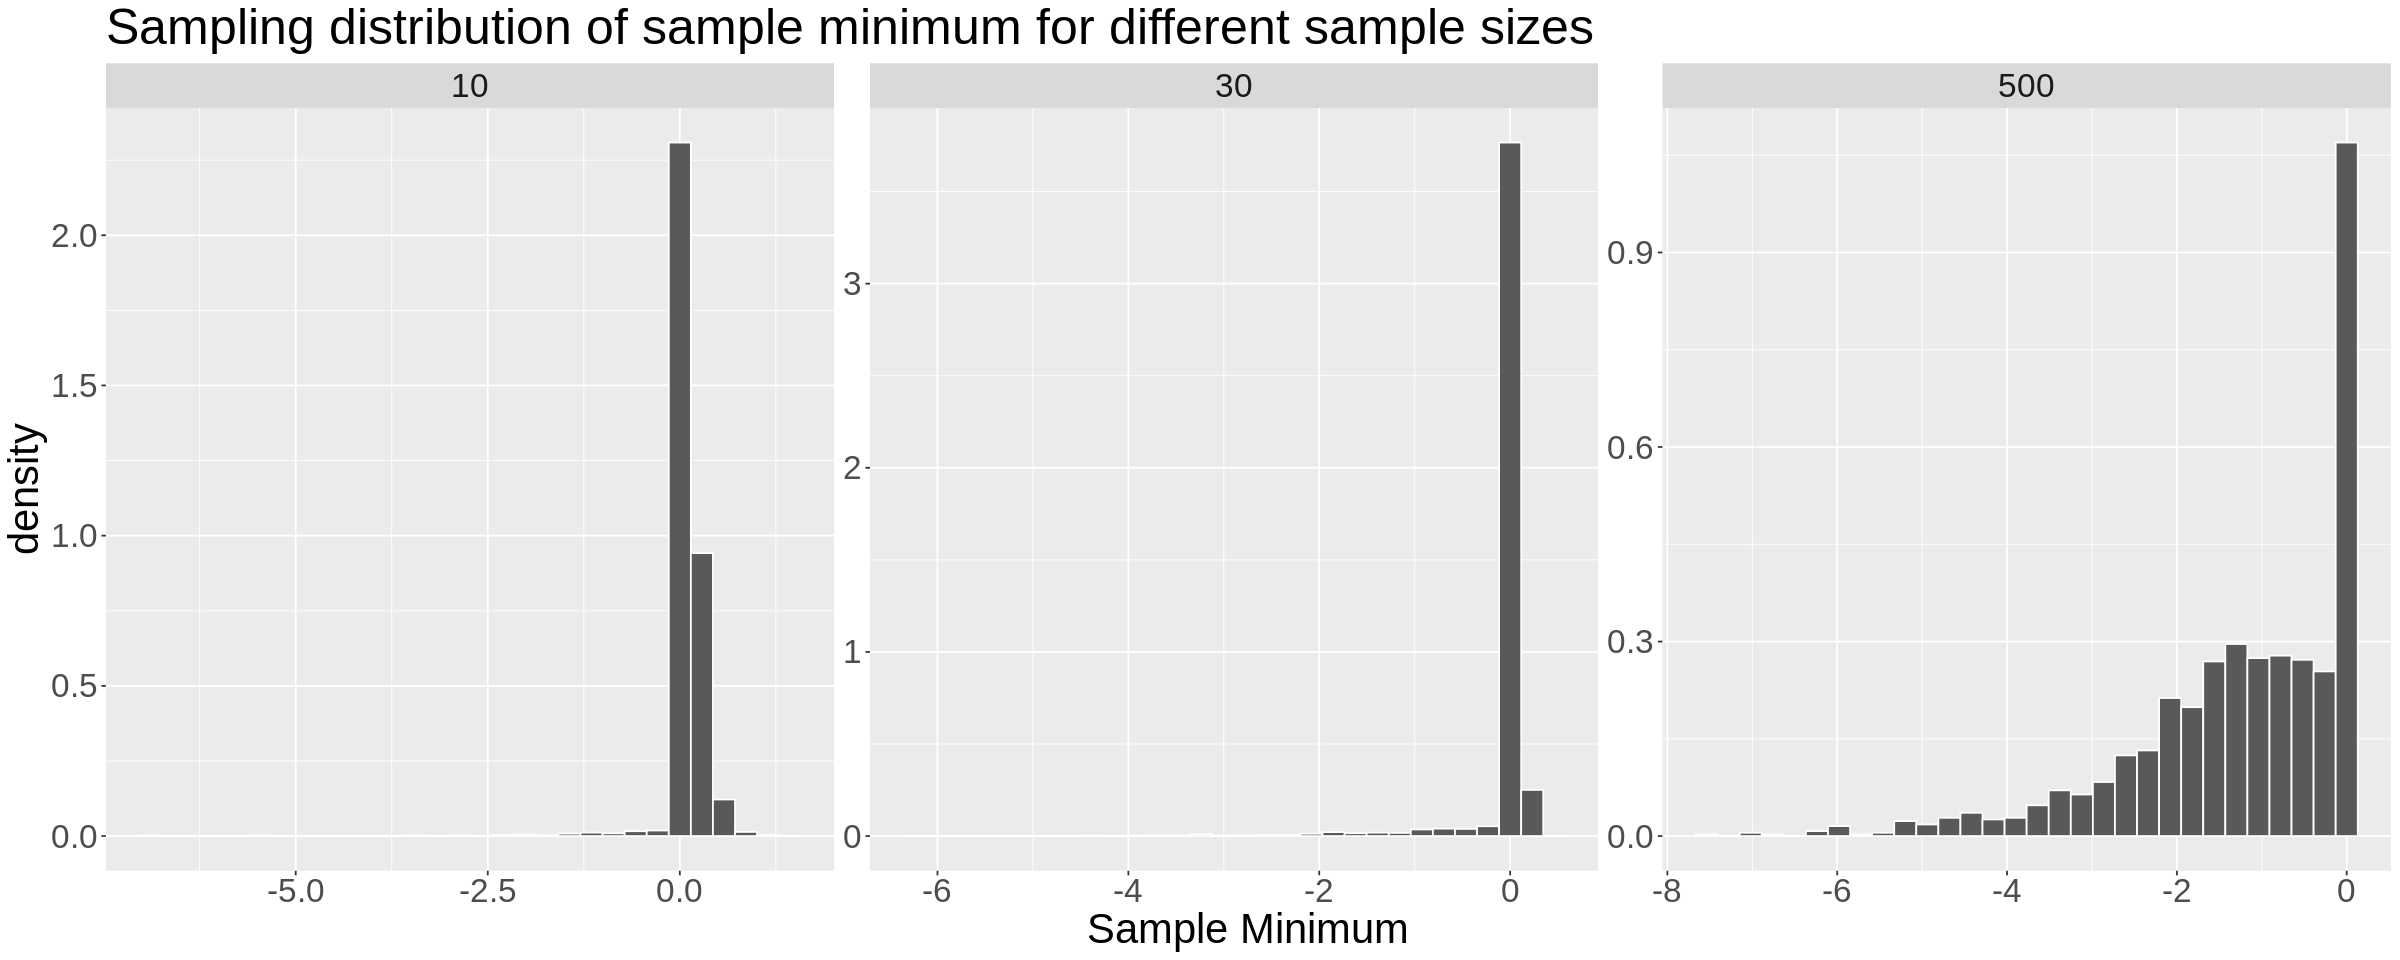

In [41]:
### BEGIN SOLUTION
sampling_dist_min <- 
    all_samples %>% 
    group_by(sample_size, replicate) %>% 
    summarise(sample_min = min(value), `.groups` = "drop") %>% 
    ggplot() +
    geom_histogram(aes(x = sample_min, y = ..density..), color = "white") +
    facet_wrap(~sample_size, scales = "free") +
    theme(text = element_text(size = 25)) + 
    ggtitle("Sampling distribution of sample minimum for different sample sizes") +
    xlab("Sample Minimum")
### END SOLUTION

sampling_dist_min

In [42]:
test_2.3.5()

[1] "Success!"


### To summarise this section:

 - The Law of Large Numbers states that the sample mean converges (i.e., gets closer and closer) to the population mean when the sample size increases. 
 - The CLT states that if we have an estimator that is a sum of random components (like the mean), then the sampling distribution of your estimator converges (i.e., gets more and more similar) to the Normal distribution.
 - The Normal distribution is very important in statistics and:
     1. It is symmetric around the mean;
     2. It has two parameters $\mu$, which is the mean of the distribution (a location parameter) and $\sigma$, which is the standard deviation of the distribution (a measure of spread).

## 3. Obtaining confidence intervals based on the CLT

In this section, you will explore how to obtain the confidence interval for the mean and proportion using the Central Limit Theorem. Remember that to calculate a confidence interval for a parameter (e.g., the population mean) using bootstrap you had to:

1. Take a sample;
2. Construct the bootstrap sampling distribution. 
3. Get the quantiles from the estimated sampling distribution. 

The only thing that will change here is that we are going to use the CLT instead of bootstrap to estimate the sampling distribution (in some cases -- remember that CLT is not always applicable). Therefore, you get to skip Step 2 because you will approximate the sampling distribution using the Normal distribution. 

We will be focused on two parameters in this section: mean and proportion. 

**Question 3.1 - Estimating the mean using CLT**
<br>{points: 1}

To estimate the mean, we use the sample average, $\bar{X}$. The CLT roughly says that $\bar{X}$ follows a Normal distribution with parameters $\mu$ and $\sigma/\sqrt{n}$:
$$
\bar{X} \sim N\left(\mu, \sigma/\sqrt{n}\right)
$$
Since we do not know $\mu$ and $\sigma$ we replace them with their estimates $\bar{x}$ and $s=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2}$ (you can calculate $s$ with the `sd` function in R).


For this question, consider the `penguins` dataset. We want to estimate the mean `body_mass_g` of the `Adelie` species. What would you use as the mean and standard deviation of the sampling distribution of $\bar{X}$? 

_Assign the mean to an object called `answer3.1_mean` and the standard deviation to an object called `answer3.1_std_error`. These values should be numbers, not data frames._

In [43]:
body_mass_g_adelie <- 
    penguins %>% 
    filter(species == 'Adelie' & !is.na(body_mass_g)) %>% 
    pull(body_mass_g)

#answer3.1_mean <- 
#    mean(..., na.rm = TRUE)

#answer3.1_std_error <-
#    sd(..., na.rm = TRUE) / ...

### BEGIN SOLUTION
answer3.1_mean <- mean(body_mass_g_adelie, na.rm = TRUE)
answer3.1_std_error <- sd(body_mass_g_adelie, na.rm = TRUE)/sqrt(length(body_mass_g_adelie))

### END SOLUTION

cat("The mean estimate is", round(answer3.1_mean,4), "\nThe std. error estimate is", round(answer3.1_std_error, 4))

The mean estimate is 3700.662 
The std. error estimate is 37.3176

In [44]:
test_3.1()

[1] "Success!"


**Question 3.2** 
<br> {points: 1}

Using the sampling distribution you specified in the previous question, obtain a 95\%  confidence interval for the mean. Use the scaffolding below:

```r
body_mass_ci <- tibble(
    lower_ci = ...
    upper_ci = ...
)
```
(Hint: the function `qnorm` can help you).

_Assign your data frame to an object called `mean_body_mass_adelie_ci`. The data frame should contain two columns only: `lower_ci` and `upper_ci`._

In [45]:
# mean_body_mass_adelie_ci <-
#     tibble(
#         lower_ci = qnorm(0.025, ..., ...),
#         upper_ci = qnorm(..., ..., ...)
#     )

### BEGIN SOLUTION
mean_body_mass_adelie_ci <- tibble(
    lower_ci = qnorm(0.025, answer3.1_mean, answer3.1_std_error),
    upper_ci = qnorm(0.975, answer3.1_mean, answer3.1_std_error)
)
### END SOLUTION

mean_body_mass_adelie_ci

lower_ci,upper_ci
<dbl>,<dbl>
3627.521,3773.803


In [46]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

For the sake of comparison, obtain a 95% confidence interval for the mean `body_mass_g` of `Adelie` specie using bootstrap with 3000 replicates. You can use the scaffolding below to help you:

```r
bootstrap_ci <- 
    penguins %>% 
    filter(...) %>% 
    specify(...) %>% 
    generate(...) %>% 
    calculate(...) %>% 
    get_ci()
```

_Assign your data frame to an object called `bootstrap_ci`. The data frame should contain two columns only: `lower_ci` and `upper_ci`._

In [47]:
set.seed(54612) # Do not change this.

### BEGIN SOLUTION
bootstrap_ci <- 
    penguins %>% 
    filter(species == 'Adelie') %>% 
    specify(response = body_mass_g) %>% 
    generate(reps = 3000, type = "bootstrap") %>% 
    calculate("mean") %>% 
    get_ci()
### END SOLUTION

bootstrap_ci

Warning message:
“Removed 1 rows containing missing values.”


lower_ci,upper_ci
<dbl>,<dbl>
3625.828,3775.828


In [48]:
test_3.3()

[1] "Success!"


**Question 3.4** 
<br> {points: 1}

Obtain the 99% confidence interval for the mean of `body_mass_g` of the `Chinstrap` specie. Use the central limit theorem.

_Assign your data frame to an object called `mean_body_mass_chinstrap_ci`. The data frame should contain two columns only: `lower_ci` and `upper_ci`._

In [49]:
# estimates <- 
#     penguins %>% 
#     filter(species == ... & !is.na(body_mass_g)) %>% 
#     summarise(sample_average = ...,
#               sample_std_error = ...)

# mean_body_mass_chinstrap_ci <- tibble(
#     lower_ci = qnorm(..., estimates$..., estimates$...),
#     upper_ci = qnorm(..., estimates$..., estimates$...)
# )

### BEGIN SOLUTION
estimates <- 
    penguins %>% 
    filter(species == 'Chinstrap' & !is.na(body_mass_g)) %>% 
    summarise(sample_average = mean(body_mass_g),
              sample_std_error = sd(body_mass_g)/sqrt(n()))

mean_body_mass_chinstrap_ci <- tibble(
    lower_ci = qnorm(0.005, estimates$sample_average, estimates$sample_std_error),
    upper_ci = qnorm(0.995, estimates$sample_average, estimates$sample_std_error)
)
### END SOLUTION

head(mean_body_mass_chinstrap_ci)

lower_ci,upper_ci
<dbl>,<dbl>
3613.035,3853.141


In [50]:
test_3.4()

[1] "Success!"


_Note: The bootstrap and CLT confidence intervals are quite close in this case, but the bootstrap interval is a little bit wider than the interval based on the CLT. One of the reasons is that we do not know $\sigma$, and we are using the sample variance, $S$, to estimate it. Therefore, there is more uncertainty around our estimator $\bar{X}$ than we are accounting for. By underestimating our uncertainty, we are making our interval narrower than it should be and, consequently, the coverage can be lower than the specified. Although in this case the difference is small, in cases of smaller sample sizes, say $n<30$ or $n<20$, the difference can be notable. In Week 10, you will learn how to improve the confidence interval based on the CLT by properly accounting for the extra uncertainty of using $S$ in place of $\sigma$._

**Question 3.5 - Estimating the proportion using CLT**
<br>{points: 1}

Next, you are going to apply the CLT to obtain the confidence interval for the proportion. A proportion is the average of a random variable that can only assume either 0 or 1. Therefore, by calculating proportions, you are summing up random terms, and we can apply the CLT. The CLT for proportions states that the sample proportion follows a Normal distribution with mean equals to $p$, the population proportion, and standard deviation $\sqrt{p(1-p)/n}$:
$$
\hat{p}\sim N\left(p, \sqrt{\frac{p(1-p)}{n}}\right)
$$

Since, we do not know $p$, the best we can do is to use $\hat{p}$ instead of $p$. For the case of proportions, the CLT provides a fairly good approximation for values of $n$ such that $n\hat{p}\geq 10$ and $n(1-\hat{p})\geq 10$. Again, the larger $n$ is, the more accurate is the approximation. 


For this question, we want to estimate the proportion of `Adelie` penguins with `body_mass_g` over 4000g. What would you use as the mean and standard deviation of the sampling distribution of $\hat{p}$? 

_Assign the mean to an object called `answer3.5_mean` and the standard deviation to an object called `answer3.5_std_error`. These objects should be numbers, not data frames._

In [51]:
#phat <- mean(...)
#answer3.5_mean <- ... 
#answer3.5_std_error <- ...

### BEGIN SOLUTION
phat <- mean(body_mass_g_adelie > 4000)
answer3.5_mean <- phat
answer3.5_std_error <- sqrt(phat*(1-phat)/length(body_mass_g_adelie))

### END SOLUTION
cat("The phat estimate is", round(phat,4), "\nThe std. error estimate is", round(answer3.5_std_error,4))

The phat estimate is 0.2318 
The std. error estimate is 0.0343

In [52]:
test_3.5()

[1] "Success!"


**Question 3.6** 
<br> {points: 1}

Using the sampling distribution you specified in the previous question, obtain a 90\%  confidence interval for the proportion of `Adelie` penguins with `body_mass_g` over 4000g. Use the scaffolding below:

```r
body_mass_ci <- tibble(
    lower_ci = ...
    upper_ci = ...
)
```
(Hint: the function `qnorm` can help you).

_Assign your data frame to an object called `prop_adelie_ci`. The data frame should contain two columns only: `lower_ci` and `upper_ci`._

In [53]:
### BEGIN SOLUTION
prop_adelie_ci <- tibble(
    lower_ci = qnorm(0.05, answer3.5_mean, answer3.5_std_error),
    upper_ci = qnorm(0.95, answer3.5_mean, answer3.5_std_error)
)
### END SOLUTION
head(prop_adelie_ci)

lower_ci,upper_ci
<dbl>,<dbl>
0.1753042,0.288272


In [54]:
test_3.6()

[1] "Success!"


**Question 3.7 - Estimating the difference in means using CLT**
<br>{points: 1}

Let's return to the penguins data set. Are `Adelie` penguins heavier than `Chinstrap` penguins? To answer this question, 
we will estimate the difference in the weights between the two species. Let's refer to the `Adelie` penguins as population 1 and `Chinstrap` penguins as population 2. 

Assuming the sample size is large enough, we can approximate the sampling distribution of $\bar{X}_1-\bar{X}_2$ by
$$
\bar{X}_1-\bar{X}_2\sim N\left(\mu_1 - \mu_2, \sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}\right)
$$

Therefore, you can obtain the confidence interval as

$$
CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}
$$
where $z^*$ is the quantile of a standard Normal.

_(Note: we could get an even better approximation of the sampling distribution using the $t$-distribution. We are going to talk about $t$-distribution next week. However, for large $n$, say $n>30$, the $t$-distribution is quite close to the normal distribution. For $n>50$ they are virtually the same.)_

Obtain the 95% confidence interval for the difference in means of Adelie penguins' weight and Chinstrap penguins' weight. The sample is stored in the object `adelie_chinstrap_sample`.

_Assign your data frame to an object called `penguins_diff_means_ci`. The data frame should have two columns: `lower_ci` and `upper_ci`._

In [55]:
# Run this cell before continuing
adelie_chinstrap_sample <- 
    penguins %>%
    filter(species %in% c("Adelie", "Chinstrap") & !is.na(body_mass_g)) %>% 
    select(species, body_mass_g)

In [56]:
adelie <- 
    adelie_chinstrap_sample %>% 
    filter(species == 'Adelie') %>% 
    pull(body_mass_g)

chinstrap <- 
    adelie_chinstrap_sample %>% 
    filter(species == 'Chinstrap') %>% 
    pull(body_mass_g)

# penguins_diff_means_ci <- 
#     tibble(
#         lower_ci = mean(...) - mean(...) - qnorm(...) * sqrt(var(...)/length(...) + var(...)/length(...)),
#         upper_ci = ...
#     )

### BEGIN SOLUTION
adelie <- 
    adelie_chinstrap_sample %>% 
    filter(species == 'Adelie') %>% 
    pull(body_mass_g)

chinstrap <- 
    adelie_chinstrap_sample %>% 
    filter(species == 'Chinstrap') %>% 
    pull(body_mass_g)

penguins_diff_means_ci <- 
    tibble(
        lower_ci = mean(adelie) - mean(chinstrap) - qnorm(0.975) * sqrt(var(adelie)/length(adelie) + var(chinstrap)/length(chinstrap)),
        upper_ci = mean(adelie) - mean(chinstrap) + qnorm(0.975) * sqrt(var(adelie)/length(adelie) + var(chinstrap)/length(chinstrap))
    )
### END SOLUTION

penguins_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-149.4484,84.59648


In [57]:
test_3.7()

[1] "Success!"
